## **Project Overview**
`OKE Garden` adalah sebuah layanan untuk menghubungkan produk petani tanaman hias serta jasa tukang taman untuk menjawab kebutuhan tamanmu yang lebih OK!

**Tujuan Utama Proyek:** Membuat dan mengembagkan dashboard interaktif yang dapat memberikan wawasan bisnis berdasarkan data dari OKE GARDEN

**Output Yang Diharapkan:** Menyediakan wawasan dari segi growth dan operational terkait desain taman (garden design)

## **Data Collection**

Tabel dan Kolom yang digunakan:

`order_design`: Tabel yang berisi data transaksi order desain
- *id_order* : primary key dari tabel order_design
- *id_user*  : foreign key ke user.id_user, adalah user / klien yang melakukan order design
- *id_designer* : foreign key ke user.id_user, adalah designer yang bertanggung jawab untuk membuat design
- *id_design_finish* : foreign key ke design.id_design, adalah design yang sudah dikerjakan oleh designer, akan memiliki value ketika designer submit design
- *id_category* : foreign key ke category_size.id_category, adalah ukuran area taman yang akan dibuatkan designya
- *status* : Status dari order design, new, paid, wait_freelancer, on_going, in_review_internal, in_review, finish, expired
- *price* : Harga final order design/jumlah yang dibayar klien untuk mengubah status dari new menjadi paid, akan memiliki value ketika user membuat order
- *created_at* : Saat order dibuat oleh user
- *updated_at* : Saat terakhir kali data order terupdate oleh siapapun itu

`user` : Tabel yang berisi data user yang melakukan transaksi dan user untuk nama designer
- *id_user* : Primary key dari tabel user
- *name* : Nama designer yang membuat design / join ke order_design berdasarkan id_designer
- *status* :  (Status designer: active)

`category_size`: Tabel yang berisi data ukuran taman
- *id_category* : Primary Key dari tabel category_size

`design`: Tabel yang berisi data mengenai design taman
- *id_design* : Primary key dari tabel design
- *status* : Status design public, private, akan memiliki value ketika designer/admin submit design

`category_design` : Tabel yang berisikan data mengenai jenis taman yang ada
- *id_category_design* : Primary key dari tabel category_design
- *name* : Nama kategori desain taman

`address_components` : Tabel yang berisi informasi mengenai lokasi pemesanan design
- *address_componentable_id* : Foreign key ke order_design berdasarkan id_order
- *address_componentable_type* : Tipe address component pada tabel, yaitu: App\Models\OrderDesign
- *administrative_area_level_1* : Informasi nama lokasi dalam Provinsi
- *administrative_area_level_2* : Informasi nama lokasi dalam Kabupaten
- *administrative_area_level_3* : Informasi nama lokasi dalam Kecamatan

## Database Connection

In [1]:
!pip install mysql-connector-python


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# import libraries
import mysql.connector
from mysql.connector import Error

In [3]:
# import pandas
import pandas as pd

#import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# import warning to ignore warning
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Force pandas to display all columns and rows
pd.options.display.max_columns = None
# pd.options.display.max_rows = None

In [5]:
# define mysql details
host   = 'okegarden-laravel-prod-db-2024-11-15-0200.cgwhhgh85mr3.ap-southeast-3.rds.amazonaws.com'
port   = '3306'
user   = 'intern_mes'
passwd = 'sdfDFLES342982Ddlsdksd'
databs = 'okegarden_laravel_prod_db'

In [6]:
# function to fetch data from database, the connection is closed after use.
def fetch_data(host_name, port_name, user_name, user_password, db_name, query, params=None):
    try:
        # use with to ensure the connection is closed after use
        with mysql.connector.connect(
            host=host_name,
            port=port_name,
            user=user_name,
            password=user_password,
            database=db_name
        ) as connection:
            data = pd.read_sql(query, connection, params=params) # read the query to dataframe format
            return data

    except Error as e:
        print(f"Error while connecting to MySQL or fetching data: {e}")
        return None

In [7]:
query_master_table = """  
SELECT 
    order_design.id_order,
    order_design.id_user,
    category_size.id_category,
    order_design.id_design_finish,
    category_design.id_category_design,
    user.name AS user_name,
    user.status AS user_status,
    design.design_name,
    design.status AS design_status,
    CASE
    	WHEN category_size.id_category = 1 THEN '< 10m^2'
		WHEN category_size.id_category = 2 THEN '11 - 20m^2'
   		WHEN category_size.id_category = 3 THEN '21 - 30m^2'
   		WHEN category_size.id_category = 4 THEN '31 - 40m^2'
   		WHEN category_size.id_category = 5 THEN '41 - 50m^2'
   		ELSE '> 50m^2'
   	END AS category_size,
   	category_design.name AS category_name,
   	order_design.status AS order_status,
   	order_design.price,
   	promo_code.code AS promo_code,
   	promo_code.valid_from,
   	promo_code.valid_until,
   	order_design.created_at,
   	order_design.updated_at,
    CASE
    	WHEN address_components.administrative_area_level_1 IN ('Daerah Khusus Ibukota Jakarta','Jakarta') THEN 'Daerah Khusus Ibukota Jakarta'
        WHEN address_components.administrative_area_level_1 = 'Banten' THEN 'Banten'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Barat', 'West Java') THEN 'Jawa Barat'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Timur', 'East Java') THEN 'Jawa Timur'
        WHEN address_components.administrative_area_level_1 = 'Bali' THEN 'Bali'
        WHEN address_components.administrative_area_level_1 = 'Sulawesi Selatan' THEN 'Sulawesi Selatan'
        WHEN address_components.administrative_area_level_1 IN ('Sumatera Utara', 'North Sumatra') THEN 'Sumatera Utara'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Tengah', 'Central Java') THEN 'Jawa Tengah'
        WHEN address_components.administrative_area_level_1 = 'Daerah Istimewa Yogyakarta' THEN 'Daerah Istimewa Yogyakarta'
        WHEN address_components.administrative_area_level_1 = 'Jambi' THEN 'Jambi'
        WHEN address_components.administrative_area_level_1 = 'Lampung' THEN 'Lampung'
        WHEN address_components.administrative_area_level_1 = 'Aceh' THEN 'Aceh'
        WHEN address_components.administrative_area_level_1 IN ('Sumatera Barat', 'West Sumatra') THEN 'Sumatera Barat'
        WHEN address_components.administrative_area_level_1 = 'Federal District' THEN 'Federal District'
        WHEN address_components.administrative_area_level_1 = '' OR address_components.administrative_area_level_1 IS NULL THEN 'Unknown Location'
        ELSE address_components.administrative_area_level_1
  	END AS province,
    CASE
        WHEN address_components.administrative_area_level_2 IN ('Badung', 'Badung Regency') THEN 'Badung'
        WHEN address_components.administrative_area_level_2 IN ('Bandung', 'Bandung Regency') THEN 'Bandung'
        WHEN address_components.administrative_area_level_2 IN ('Banyumas', 'Banyumas Regency') THEN 'Banyumas'
        WHEN address_components.administrative_area_level_2 IN ('Bekasi', 'Bekasi Regency') THEN 'Bekasi'
        WHEN address_components.administrative_area_level_2 IN ('Bogor', 'Bogor Regency') THEN 'Bogor'
        WHEN address_components.administrative_area_level_2 IN ('Central Jakarta City', 'Jakarta Pusat') THEN 'Jakarta Pusat'
        WHEN address_components.administrative_area_level_2 IN ('Ciamis', 'Ciamis Regency') THEN 'Ciamis'
        WHEN address_components.administrative_area_level_2 IN ('Cimahi', 'Cimahi City') THEN 'Cimahi'
        WHEN address_components.administrative_area_level_2 IN ('Deli Serdang', 'Deli Serdang Regency') THEN 'Deli Serdang'
        WHEN address_components.administrative_area_level_2 IN ('Depok', 'Depok City') THEN 'Depok'
        WHEN address_components.administrative_area_level_2 IN ('East Jakarta City', 'Jakarta Timur') THEN 'Jakarta Timur'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Barat', 'West Jakarta City') THEN 'Jakarta Barat'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Selatan', 'South Jakarta City') THEN 'Jakarta Selatan'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Utara', 'North Jakarta City') THEN 'Jakarta Utara'
        WHEN address_components.administrative_area_level_2 IN ('Jember', 'Jember Regency') THEN 'Jember'
        WHEN address_components.administrative_area_level_2 IN ('Klungkung', 'Klungkung Regency') THEN 'Klungkung'
        WHEN address_components.administrative_area_level_2 IN ('Pringsewu', 'Pringsewu Regency') THEN 'Pringsewu'
        WHEN address_components.administrative_area_level_2 IN ('Sukabumi', 'Sukabumi City') THEN 'Sukabumi'
        WHEN address_components.administrative_area_level_2 IN ('Tangerang', 'Tangerang City', 'Tangerang Regency') THEN 'Tangerang'
        WHEN address_components.administrative_area_level_2 IN ('Tangerang Selatan', 'South Tangerang City') THEN 'Tangerang Selatan'
        WHEN address_components.administrative_area_level_2 IN ('West Bandung', 'West Bandung Regency') THEN 'Bandung Barat'
        WHEN address_components.administrative_area_level_2 = ' ' THEN 'Unknown City'
        ELSE address_components.administrative_area_level_2
    END AS city,
    CASE
        WHEN address_components.administrative_area_level_3 IN ('South Kuta') THEN 'Kuta Selatan'
        WHEN address_components.administrative_area_level_3 = ' ' THEN 'Unknown District'
        ELSE address_components.administrative_area_level_3
    END AS district
    FROM
    	order_design
    LEFT JOIN
    	user ON user.id_user = order_design.id_designer
    LEFT JOIN
    	category_size ON category_size.id_category = order_design.id_category
    LEFT JOIN
    	design ON design.id_design = order_design.id_design_finish
    LEFT JOIN
    	category_design ON category_design.id_category_design = design.id_type
    LEFT JOIN
    	address_components ON address_components.address_componentable_id = order_design.id_order
    LEFT JOIN 
        promo_code ON promo_code.id_promo = order_design.id_promo
    WHERE 
    	order_design.id_user > 249
    AND
    	order_design.status NOT IN ('expired','new');
"""

## Master Table

In [8]:
# master table
master_table = fetch_data(host, port, user, passwd, databs, query_master_table)
master_table

,id_order,id_user,id_category,id_design_finish,id_category_design,user_name,user_status,design_name,design_status,category_size,category_name,order_status,price,promo_code,valid_from,valid_until,created_at,updated_at,province,city,district
0,568,921,3,244.0,2.0,Muhammad Waldi Fiddaroini,active,Taman Rakhmania Pithaloka,private,21 - 30m^2,Kering,in_review,388500.0,PREBUILD50,2024-04-17 11:14:00,2024-10-03 23:14:00,2024-04-20 15:28:15,2024-05-13 10:13:59,Banten,Tangerang Selatan,Unknown District
1,569,923,1,236.0,2.0,Nazun Thousan,active,Taman Iqbal,private,< 10m^2,Kering,in_review,277500.0,PREBUILD50,2024-04-17 11:14:00,2024-10-03 23:14:00,2024-04-21 10:30:22,2024-05-15 15:58:58,Daerah Khusus Ibukota Jakarta,Jakarta Timur,Cakung
2,570,925,4,214.0,3.0,Diandra Faradina,active,Taman Lintang R,private,31 - 40m^2,Minimalis,finish,444000.0,PREBUILD50,2024-04-17 11:14:00,2024-10-03 23:14:00,2024-04-21 16:00:33,2024-05-14 08:55:30,Daerah Khusus Ibukota Jakarta,Jakarta Timur,Ciracas
3,571,926,3,219.0,1.0,Shafa Miranti,active,Taman Susy,private,21 - 30m^2,Tropis,in_review,388500.0,PREBUILD50,2024-04-17 11:14:00,2024-10-03 23:14:00,2024-04-22 10:25:36,2024-05-15 20:41:09,Banten,Tangerang Selatan,Pondok Aren
4,572,927,2,213.0,1.0,Nurfadliani Kadir,active,Taman Regina,publish,11 - 20m^2,Tropis,finish,0.0,None,NaT,NaT,2024-04-22 11:41:42,2024-05-13 10:13:59,Daerah Khusus Ibukota Jakarta,Jakarta Timur,Pasar Rebo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,1012,1951,1,NaN,NaN,Fitria khoerunnisa,active,None,None,< 10m^2,None,wait_freelancer,450000.0,DESAINHEMAT,2024-08-01 00:00:00,2025-01-01 23:59:00,2024-11-13 15:38:57,2024-11-14 17:36:55,Unknown Location,None,None
355,1013,1958,1,NaN,NaN,Hendri caw,active,None,None,< 10m^2,None,wait_freelancer,0.0,freesurvey,2024-04-22 14:32:00,2024-12-31 14:32:00,2024-11-14 09:32:30,2024-11-14 14:36:39,Unknown Location,None,None
356,1016,1961,1,NaN,NaN,None,None,None,None,< 10m^2,None,paid,0.0,freesurvey,2024-04-22 14:32:00,2024-12-31 14:32:00,2024-11-14 16:14:14,2024-11-14 16:15:36,Unknown Location,None,None
357,1017,1967,1,NaN,NaN,None,None,None,None,< 10m^2,None,paid,0.0,freesurvey,2024-04-22 14:32:00,2024-12-31 14:32:00,2024-11-15 08:32:14,2024-11-15 08:32:14,Unknown Location,None,None


## Data Assesment

In [9]:
master_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id_order            359 non-null    int64         
 1   id_user             359 non-null    int64         
 2   id_category         359 non-null    int64         
 3   id_design_finish    297 non-null    float64       
 4   id_category_design  295 non-null    float64       
 5   user_name           324 non-null    object        
 6   user_status         324 non-null    object        
 7   design_name         297 non-null    object        
 8   design_status       297 non-null    object        
 9   category_size       359 non-null    object        
 10  category_name       295 non-null    object        
 11  order_status        359 non-null    object        
 12  price               356 non-null    float64       
 13  promo_code          348 non-null    object        

Berdasarkan informasi diatas, kita dapat melihat bahwa data table memiliki 359 baris dan terdiri dari 21 kolom, serta terdiri dari beberapa tipe data seperti `int64`, `float64`, `object` dan `datetime64[ns]`

## Missing Value

In [10]:
master_table.isnull().sum()

id_order                0
id_user                 0
id_category             0
id_design_finish       62
id_category_design     64
user_name              35
user_status            35
design_name            62
design_status          62
category_size           0
category_name          64
order_status            0
price                   3
promo_code             11
valid_from             11
valid_until            11
created_at              0
updated_at              0
province                0
city                  160
district              160
dtype: int64

Pada identifikasi missing value pada data yang akan digunakan, ditemukan nilai null pada kolom `id_design_finish`, `id_category_design`, `user_name`, `address_componentable_type`, `user_status`, `design_name`, `design_status` dan `category_name`, `price`, `province`, `promo_code`, `valid_from`, `valid_until`, `city`, dan `district`. Berdasarkan konfirmasi, nilai null tersebut akan tetap diproses sebagai null values. Jadi untuk saat ini tidak ada penanganan lebih lanjut terhadap missing value tersebut.

## Outlier

In [11]:
numeric_cols = master_table.select_dtypes(include=['float64', 'int64']).columns
print(numeric_cols)

Index(['id_order', 'id_user', 'id_category', 'id_design_finish',
       'id_category_design', 'price'],
      dtype='object')


In [12]:
# Fungsi untuk mendeteksi outlier menggunakan IQR
def detect_outliers_iqr(master_table, column):
    Q1 = master_table[column].quantile(0.25)
    Q3 = master_table[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = master_table[(master_table[column] < lower_bound) | (master_table[column] > upper_bound)]
    return outliers

# Iterasi setiap kolom dalam dataset
for column in master_table.columns:
    # Hanya proses kolom numerik
    if master_table[column].dtype in ['int64', 'float64']:
        # Deteksi outlier tiap kolom numerik
        outliers = detect_outliers_iqr(master_table, column)
        print(f'Outliers Detected : {column} {len(outliers)}')

Outliers Detected : id_order 0
Outliers Detected : id_user 5
Outliers Detected : id_category 0
Outliers Detected : id_design_finish 0
Outliers Detected : id_category_design 0
Outliers Detected : price 49


- Berdasarkan uji outliers dengan IQR, ditemukan outliers pada kolom `id_user` dan `price`
- Setelah dikonfirmasi kembali, outliers pada `id_user` di handling dengan mengecualikan id_user yang < 250 dikarenakan id_user tersebut adalah id untuk testing
- Untuk kolom `price` yang terdapat outlier, data akan tetap di proses (outliers tetap diproses dalam analisis)

## Exploratory Data Analysis

In [13]:
#Describe data numeric
master_table.describe()

,id_order,id_user,id_category,id_design_finish,id_category_design,price,valid_from,valid_until,created_at,updated_at
count,359.000000,359.000000,359.000000,297.000000,295.000000,3.560000e+02,348,348,359,359
mean,786.752089,1374.256267,2.286908,410.973064,2.132203,1.006004e+05,2024-05-11 08:22:37.586207232,2024-12-10 04:29:59.827586304,2024-08-04 09:50:39.515320320,2024-08-24 00:47:48.509749248
min,568.000000,263.000000,1.000000,213.000000,1.000000,0.000000e+00,2024-04-17 11:14:00,2024-05-13 09:47:00,2024-04-20 15:28:15,2024-05-13 10:13:59
25%,670.500000,1096.000000,1.000000,337.000000,1.000000,0.000000e+00,2024-04-22 14:32:00,2024-12-31 14:32:00,2024-06-21 09:29:02.500000,2024-07-16 14:26:13
50%,790.000000,1400.000000,2.000000,417.000000,2.000000,0.000000e+00,2024-04-22 14:32:00,2024-12-31 14:32:00,2024-08-11 15:51:40,2024-08-25 20:05:46
75%,893.500000,1605.500000,3.000000,500.000000,3.000000,1.250000e+05,2024-04-22 14:32:00,2024-12-31 14:32:00,2024-09-11 03:18:04,2024-10-08 06:23:57.500000
max,1018.000000,1968.000000,6.000000,594.000000,4.000000,1.225000e+06,2024-10-06 06:49:00,2025-01-01 23:59:00,2024-11-15 08:47:27,2024-11-15 08:47:27
std,128.996524,323.294755,1.660794,107.647476,0.836750,1.994528e+05,NaN,NaN,NaN,NaN


Berdasarkan informasi di atas kita dapat menemukan beberapa hal:
- Data order yang akan dianalisis adalah data dari rentang id_order 568 sampai 1018.
- Id_user terkecil adalah 263 yang berarti sudah bersih dari id testing dan data yang akan dianalisis adalah dari rentang id_user 263 sampai 1968.
- Id_design_finish masih ada nilai null yang berarti ada design yang masing belum terselesaikan dan yang akan dianalisis dari rentang id_design_finish 213 sampai 594.
- Terdapat 3 data harga yang null, harga design terendah adalah 0 dan tertinggi adalah 1.225.0000 dan rata-rata harga adalah 1.006.004


In [14]:
#Describe data object
master_table.describe(include='object')

,user_name,user_status,design_name,design_status,category_size,category_name,order_status,promo_code,province,city,district
count,324,324,297,297,359,295,359,348,359,199,199
unique,58,1,284,2,6,4,6,14,14,32,105
top,Arista Putri Valentin,active,Taman Dhini,private,< 10m^2,Minimalis,in_review,freesurvey,Unknown Location,Tangerang Selatan,Unknown District
freq,32,324,2,199,162,116,151,237,161,28,16


Dari informasi diatas dapat diketahui bahwa:
- User_name atau nama desainer yang paling sering muncul adalah Arista Putri Valentin dengan total frekuensi sebanyak 32.
- Nama design yang memiliki frekuensi paling banyak adalah Taman Dhini dengan total frekuensi sebanyak 2 kali.
- Categori ukuran taman paling populer berdasarkan tabel diatas adalah kategori ukuran taman <10m^2 sedangkan untuk kategori taman adalah minimalis.
- Masih banyak orderan yang tidak diketahui provinsinya.
- Status order sebagian besar masih in_review (customer review)
- Terdapat 39 desainer yang statusnya tidak aktif
- Kode promo yang paling laris adalah `freesurvey`

## Insights

### Growth

#### Pendapatan Per Bulan 

In [37]:
query_pendapatan_per_bulan = """  
SELECT 
	SUM(price) AS total_pendapatan,
	DATE_FORMAT(created_at, '%M') AS nama_bulan
FROM(
	SELECT 
    order_design.id_order,
    order_design.id_user,
    category_size.id_category,
    order_design.id_design_finish,
    category_design.id_category_design,
    user.name AS user_name,
    user.status AS user_status,
    design.design_name,
    design.status AS design_status,
    CASE
    	WHEN category_size.id_category = 1 THEN '< 10m^2'
		WHEN category_size.id_category = 2 THEN '11 - 20m^2'
   		WHEN category_size.id_category = 3 THEN '21 - 30m^2'
   		WHEN category_size.id_category = 4 THEN '31 - 40m^2'
   		WHEN category_size.id_category = 5 THEN '41 - 50m^2'
   		ELSE '> 50m^2'
   	END AS category_size,
   	category_design.name AS category_name,
   	order_design.status AS order_status,
   	order_design.price,
   	promo_code.code AS promo_code,
   	promo_code.valid_from,
   	promo_code.valid_until,
   	order_design.created_at,
   	order_design.updated_at,
    CASE
    	WHEN address_components.administrative_area_level_1 IN ('Daerah Khusus Ibukota Jakarta','Jakarta') THEN 'Daerah Khusus Ibukota Jakarta'
        WHEN address_components.administrative_area_level_1 = 'Banten' THEN 'Banten'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Barat', 'West Java') THEN 'Jawa Barat'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Timur', 'East Java') THEN 'Jawa Timur'
        WHEN address_components.administrative_area_level_1 = 'Bali' THEN 'Bali'
        WHEN address_components.administrative_area_level_1 = 'Sulawesi Selatan' THEN 'Sulawesi Selatan'
        WHEN address_components.administrative_area_level_1 IN ('Sumatera Utara', 'North Sumatra') THEN 'Sumatera Utara'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Tengah', 'Central Java') THEN 'Jawa Tengah'
        WHEN address_components.administrative_area_level_1 = 'Daerah Istimewa Yogyakarta' THEN 'Daerah Istimewa Yogyakarta'
        WHEN address_components.administrative_area_level_1 = 'Jambi' THEN 'Jambi'
        WHEN address_components.administrative_area_level_1 = 'Lampung' THEN 'Lampung'
        WHEN address_components.administrative_area_level_1 = 'Aceh' THEN 'Aceh'
        WHEN address_components.administrative_area_level_1 IN ('Sumatera Barat', 'West Sumatra') THEN 'Sumatera Barat'
        WHEN address_components.administrative_area_level_1 = 'Federal District' THEN 'Federal District'
        WHEN address_components.administrative_area_level_1 = '' OR address_components.administrative_area_level_1 IS NULL THEN 'Unknown Location'
        ELSE address_components.administrative_area_level_1
  	END AS province,
    CASE
        WHEN address_components.administrative_area_level_2 IN ('Badung', 'Badung Regency') THEN 'Badung'
        WHEN address_components.administrative_area_level_2 IN ('Bandung', 'Bandung Regency') THEN 'Bandung'
        WHEN address_components.administrative_area_level_2 IN ('Banyumas', 'Banyumas Regency') THEN 'Banyumas'
        WHEN address_components.administrative_area_level_2 IN ('Bekasi', 'Bekasi Regency') THEN 'Bekasi'
        WHEN address_components.administrative_area_level_2 IN ('Bogor', 'Bogor Regency') THEN 'Bogor'
        WHEN address_components.administrative_area_level_2 IN ('Central Jakarta City', 'Jakarta Pusat') THEN 'Jakarta Pusat'
        WHEN address_components.administrative_area_level_2 IN ('Ciamis', 'Ciamis Regency') THEN 'Ciamis'
        WHEN address_components.administrative_area_level_2 IN ('Cimahi', 'Cimahi City') THEN 'Cimahi'
        WHEN address_components.administrative_area_level_2 IN ('Deli Serdang', 'Deli Serdang Regency') THEN 'Deli Serdang'
        WHEN address_components.administrative_area_level_2 IN ('Depok', 'Depok City') THEN 'Depok'
        WHEN address_components.administrative_area_level_2 IN ('East Jakarta City', 'Jakarta Timur') THEN 'Jakarta Timur'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Barat', 'West Jakarta City') THEN 'Jakarta Barat'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Selatan', 'South Jakarta City') THEN 'Jakarta Selatan'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Utara', 'North Jakarta City') THEN 'Jakarta Utara'
        WHEN address_components.administrative_area_level_2 IN ('Jember', 'Jember Regency') THEN 'Jember'
        WHEN address_components.administrative_area_level_2 IN ('Klungkung', 'Klungkung Regency') THEN 'Klungkung'
        WHEN address_components.administrative_area_level_2 IN ('Pringsewu', 'Pringsewu Regency') THEN 'Pringsewu'
        WHEN address_components.administrative_area_level_2 IN ('Sukabumi', 'Sukabumi City') THEN 'Sukabumi'
        WHEN address_components.administrative_area_level_2 IN ('Tangerang', 'Tangerang City', 'Tangerang Regency') THEN 'Tangerang'
        WHEN address_components.administrative_area_level_2 IN ('Tangerang Selatan', 'South Tangerang City') THEN 'Tangerang Selatan'
        WHEN address_components.administrative_area_level_2 IN ('West Bandung', 'West Bandung Regency') THEN 'Bandung Barat'
        WHEN address_components.administrative_area_level_2 = ' ' THEN 'Unknown City'
        ELSE address_components.administrative_area_level_2
    END AS city,
    CASE
        WHEN address_components.administrative_area_level_3 IN ('South Kuta') THEN 'Kuta Selatan'
        WHEN address_components.administrative_area_level_3 = ' ' THEN 'Unknown District'
        ELSE address_components.administrative_area_level_3
    END AS district
    FROM
    	order_design
    LEFT JOIN
    	user ON user.id_user = order_design.id_designer
    LEFT JOIN
    	category_size ON category_size.id_category = order_design.id_category
    LEFT JOIN
    	design ON design.id_design = order_design.id_design_finish
    LEFT JOIN
    	category_design ON category_design.id_category_design = design.id_type
    LEFT JOIN
    	address_components ON address_components.address_componentable_id = order_design.id_order
    LEFT JOIN 
        promo_code ON promo_code.id_promo = order_design.id_promo
    WHERE 
    	order_design.id_user > 249
    AND
    	order_design.status NOT IN ('expired','new')
) AS master_table
GROUP BY nama_bulan
ORDER BY created_at;
"""

In [38]:
pendapatan_per_bulan = fetch_data(host, port, user, passwd, databs, query_pendapatan_per_bulan)
pendapatan_per_bulan

,total_pendapatan,nama_bulan
0,3274500.0,April
1,3191250.0,May
2,0.0,June
3,6675000.0,July
4,7250000.0,August
5,6610000.0,September
6,5143000.0,October
7,3670000.0,November


In [39]:
import plotly.express as px # plotly
fig = px.line(pendapatan_per_bulan, x="nama_bulan", y="total_pendapatan", title="Total Pendapatan Berdasarkan Bulan", markers=True)
fig.update_xaxes(title="Nama Bulan")
fig.update_yaxes(title="Total Pendapatan")
fig.show()

Berdasarkan grafik tersebut, bulan `Juni` tidak ada pendapatan sama sekali (*Rp 0*), kami sudah konfirmasi bahwa benar tidak ada pendapatan pada bulan tersebut. Tren dari bulan `April` hingga `Juni` menurun. Kemudian dari bulan `Juni` hingga `Agustus` meningkat. Selanjutnya dari bulan `Agustus` hingga `November` kembali menurun. Puncak pendapatan tertinggi ada pada bulan `Agustus` yaitu *Rp 7.250.000*

#### Pendapatan Berdasarkan Provinsi

In [43]:
query_pendapatan_per_provinsi= """  
SELECT
    province AS provinsi,
    sum(price) AS total_pendapatan
FROM (
	SELECT 
    order_design.id_order,
    order_design.id_user,
    category_size.id_category,
    order_design.id_design_finish,
    category_design.id_category_design,
    user.name AS user_name,
    user.status AS user_status,
    design.design_name,
    design.status AS design_status,
    CASE
    	WHEN category_size.id_category = 1 THEN '< 10m^2'
		WHEN category_size.id_category = 2 THEN '11 - 20m^2'
   		WHEN category_size.id_category = 3 THEN '21 - 30m^2'
   		WHEN category_size.id_category = 4 THEN '31 - 40m^2'
   		WHEN category_size.id_category = 5 THEN '41 - 50m^2'
   		ELSE '> 50m^2'
   	END AS category_size,
   	category_design.name AS category_name,
   	order_design.status AS order_status,
   	order_design.price,
   	promo_code.code AS promo_code,
   	promo_code.valid_from,
   	promo_code.valid_until,
   	order_design.created_at,
   	order_design.updated_at,
    CASE
    	WHEN address_components.administrative_area_level_1 IN ('Daerah Khusus Ibukota Jakarta','Jakarta') THEN 'Daerah Khusus Ibukota Jakarta'
        WHEN address_components.administrative_area_level_1 = 'Banten' THEN 'Banten'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Barat', 'West Java') THEN 'Jawa Barat'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Timur', 'East Java') THEN 'Jawa Timur'
        WHEN address_components.administrative_area_level_1 = 'Bali' THEN 'Bali'
        WHEN address_components.administrative_area_level_1 = 'Sulawesi Selatan' THEN 'Sulawesi Selatan'
        WHEN address_components.administrative_area_level_1 IN ('Sumatera Utara', 'North Sumatra') THEN 'Sumatera Utara'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Tengah', 'Central Java') THEN 'Jawa Tengah'
        WHEN address_components.administrative_area_level_1 = 'Daerah Istimewa Yogyakarta' THEN 'Daerah Istimewa Yogyakarta'
        WHEN address_components.administrative_area_level_1 = 'Jambi' THEN 'Jambi'
        WHEN address_components.administrative_area_level_1 = 'Lampung' THEN 'Lampung'
        WHEN address_components.administrative_area_level_1 = 'Aceh' THEN 'Aceh'
        WHEN address_components.administrative_area_level_1 IN ('Sumatera Barat', 'West Sumatra') THEN 'Sumatera Barat'
        WHEN address_components.administrative_area_level_1 = 'Federal District' THEN 'Federal District'
        WHEN address_components.administrative_area_level_1 = '' OR address_components.administrative_area_level_1 IS NULL THEN 'Unknown Location'
        ELSE address_components.administrative_area_level_1
  	END AS province,
    CASE
        WHEN address_components.administrative_area_level_2 IN ('Badung', 'Badung Regency') THEN 'Badung'
        WHEN address_components.administrative_area_level_2 IN ('Bandung', 'Bandung Regency') THEN 'Bandung'
        WHEN address_components.administrative_area_level_2 IN ('Banyumas', 'Banyumas Regency') THEN 'Banyumas'
        WHEN address_components.administrative_area_level_2 IN ('Bekasi', 'Bekasi Regency') THEN 'Bekasi'
        WHEN address_components.administrative_area_level_2 IN ('Bogor', 'Bogor Regency') THEN 'Bogor'
        WHEN address_components.administrative_area_level_2 IN ('Central Jakarta City', 'Jakarta Pusat') THEN 'Jakarta Pusat'
        WHEN address_components.administrative_area_level_2 IN ('Ciamis', 'Ciamis Regency') THEN 'Ciamis'
        WHEN address_components.administrative_area_level_2 IN ('Cimahi', 'Cimahi City') THEN 'Cimahi'
        WHEN address_components.administrative_area_level_2 IN ('Deli Serdang', 'Deli Serdang Regency') THEN 'Deli Serdang'
        WHEN address_components.administrative_area_level_2 IN ('Depok', 'Depok City') THEN 'Depok'
        WHEN address_components.administrative_area_level_2 IN ('East Jakarta City', 'Jakarta Timur') THEN 'Jakarta Timur'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Barat', 'West Jakarta City') THEN 'Jakarta Barat'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Selatan', 'South Jakarta City') THEN 'Jakarta Selatan'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Utara', 'North Jakarta City') THEN 'Jakarta Utara'
        WHEN address_components.administrative_area_level_2 IN ('Jember', 'Jember Regency') THEN 'Jember'
        WHEN address_components.administrative_area_level_2 IN ('Klungkung', 'Klungkung Regency') THEN 'Klungkung'
        WHEN address_components.administrative_area_level_2 IN ('Pringsewu', 'Pringsewu Regency') THEN 'Pringsewu'
        WHEN address_components.administrative_area_level_2 IN ('Sukabumi', 'Sukabumi City') THEN 'Sukabumi'
        WHEN address_components.administrative_area_level_2 IN ('Tangerang', 'Tangerang City', 'Tangerang Regency') THEN 'Tangerang'
        WHEN address_components.administrative_area_level_2 IN ('Tangerang Selatan', 'South Tangerang City') THEN 'Tangerang Selatan'
        WHEN address_components.administrative_area_level_2 IN ('West Bandung', 'West Bandung Regency') THEN 'Bandung Barat'
        WHEN address_components.administrative_area_level_2 = ' ' THEN 'Unknown City'
        ELSE address_components.administrative_area_level_2
    END AS city,
    CASE
        WHEN address_components.administrative_area_level_3 IN ('South Kuta') THEN 'Kuta Selatan'
        WHEN address_components.administrative_area_level_3 = ' ' THEN 'Unknown District'
        ELSE address_components.administrative_area_level_3
    END AS district
    FROM
    	order_design
    LEFT JOIN
    	user ON user.id_user = order_design.id_designer
    LEFT JOIN
    	category_size ON category_size.id_category = order_design.id_category
    LEFT JOIN
    	design ON design.id_design = order_design.id_design_finish
    LEFT JOIN
    	category_design ON category_design.id_category_design = design.id_type
    LEFT JOIN
    	address_components ON address_components.address_componentable_id = order_design.id_order
    LEFT JOIN 
        promo_code ON promo_code.id_promo = order_design.id_promo
    WHERE 
    	order_design.id_user > 249
    AND
    	order_design.status NOT IN ('expired','new')
    AND 
	    address_componentable_type like '%OrderDesign%'
) AS master_table
GROUP BY 
	provinsi
ORDER BY 
	total_pendapatan DESC;
"""

In [44]:
pendapatan_per_provinsi = fetch_data(host, port, user, passwd, databs, query_pendapatan_per_provinsi)
pendapatan_per_provinsi

,provinsi,total_pendapatan
0,Jawa Barat,5321750.0
1,Daerah Khusus Ibukota Jakarta,4900500.0
2,Banten,1872000.0
3,Sumatera Utara,1350000.0
4,Jawa Timur,873000.0
5,Federal District,540000.0
6,Jambi,450000.0
7,Unknown Location,388500.0
8,Bali,250000.0
9,Sumatera Barat,0.0


In [45]:
fig = px.bar(pendapatan_per_provinsi, x="provinsi", y="total_pendapatan", title="Total Pendapatan Per Provinsi")
fig.update_xaxes(title="Provinsi")
fig.update_yaxes(title="Total Pendapatan")
fig.show()

Berdasarkan informasi di atas provinsi `Jawa Barat` adalah provinsi dengan hasil tertinggi dari pendapatan pembuatan design dengan jumlah *Rp 5.321.750*. Sedangkan untuk provinsi `Sumatera Barat`,`Daerah Istimewa Yogyakarta`, `Jawa Tengah`, `Lampung`, `Sulawesi Selatan` tidak ada pendapatan sama sekali atau *Rp 0*.

#### Pendapatan Berdasarkan Kota

In [46]:
query_pendapatan_per_kota = """
SELECT 
    city,
    SUM(price) AS total_pendapatan
FROM(
	SELECT 
    order_design.id_order,
    order_design.id_user,
    category_size.id_category,
    order_design.id_design_finish,
    category_design.id_category_design,
    user.name AS user_name,
    user.status AS user_status,
    design.design_name,
    design.status AS design_status,
    CASE
    	WHEN category_size.id_category = 1 THEN '< 10m^2'
		WHEN category_size.id_category = 2 THEN '11 - 20m^2'
   		WHEN category_size.id_category = 3 THEN '21 - 30m^2'
   		WHEN category_size.id_category = 4 THEN '31 - 40m^2'
   		WHEN category_size.id_category = 5 THEN '41 - 50m^2'
   		ELSE '> 50m^2'
   	END AS category_size,
   	category_design.name AS category_name,
   	order_design.status AS order_status,
   	order_design.price,
   	promo_code.code AS promo_code,
   	promo_code.valid_from,
   	promo_code.valid_until,
   	order_design.created_at,
   	order_design.updated_at,
    CASE
    	WHEN address_components.administrative_area_level_1 IN ('Daerah Khusus Ibukota Jakarta','Jakarta') THEN 'Daerah Khusus Ibukota Jakarta'
        WHEN address_components.administrative_area_level_1 = 'Banten' THEN 'Banten'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Barat', 'West Java') THEN 'Jawa Barat'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Timur', 'East Java') THEN 'Jawa Timur'
        WHEN address_components.administrative_area_level_1 = 'Bali' THEN 'Bali'
        WHEN address_components.administrative_area_level_1 = 'Sulawesi Selatan' THEN 'Sulawesi Selatan'
        WHEN address_components.administrative_area_level_1 IN ('Sumatera Utara', 'North Sumatra') THEN 'Sumatera Utara'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Tengah', 'Central Java') THEN 'Jawa Tengah'
        WHEN address_components.administrative_area_level_1 = 'Daerah Istimewa Yogyakarta' THEN 'Daerah Istimewa Yogyakarta'
        WHEN address_components.administrative_area_level_1 = 'Jambi' THEN 'Jambi'
        WHEN address_components.administrative_area_level_1 = 'Lampung' THEN 'Lampung'
        WHEN address_components.administrative_area_level_1 = 'Aceh' THEN 'Aceh'
        WHEN address_components.administrative_area_level_1 IN ('Sumatera Barat', 'West Sumatra') THEN 'Sumatera Barat'
        WHEN address_components.administrative_area_level_1 = 'Federal District' THEN 'Federal District'
        WHEN address_components.administrative_area_level_1 = '' OR address_components.administrative_area_level_1 IS NULL THEN 'Unknown Location'
        ELSE address_components.administrative_area_level_1
  	END AS province,
    CASE
        WHEN address_components.administrative_area_level_2 IN ('Badung', 'Badung Regency') THEN 'Badung'
        WHEN address_components.administrative_area_level_2 IN ('Bandung', 'Bandung Regency') THEN 'Bandung'
        WHEN address_components.administrative_area_level_2 IN ('Banyumas', 'Banyumas Regency') THEN 'Banyumas'
        WHEN address_components.administrative_area_level_2 IN ('Bekasi', 'Bekasi Regency') THEN 'Bekasi'
        WHEN address_components.administrative_area_level_2 IN ('Bogor', 'Bogor Regency') THEN 'Bogor'
        WHEN address_components.administrative_area_level_2 IN ('Central Jakarta City', 'Jakarta Pusat') THEN 'Jakarta Pusat'
        WHEN address_components.administrative_area_level_2 IN ('Ciamis', 'Ciamis Regency') THEN 'Ciamis'
        WHEN address_components.administrative_area_level_2 IN ('Cimahi', 'Cimahi City') THEN 'Cimahi'
        WHEN address_components.administrative_area_level_2 IN ('Deli Serdang', 'Deli Serdang Regency') THEN 'Deli Serdang'
        WHEN address_components.administrative_area_level_2 IN ('Depok', 'Depok City') THEN 'Depok'
        WHEN address_components.administrative_area_level_2 IN ('East Jakarta City', 'Jakarta Timur') THEN 'Jakarta Timur'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Barat', 'West Jakarta City') THEN 'Jakarta Barat'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Selatan', 'South Jakarta City') THEN 'Jakarta Selatan'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Utara', 'North Jakarta City') THEN 'Jakarta Utara'
        WHEN address_components.administrative_area_level_2 IN ('Jember', 'Jember Regency') THEN 'Jember'
        WHEN address_components.administrative_area_level_2 IN ('Klungkung', 'Klungkung Regency') THEN 'Klungkung'
        WHEN address_components.administrative_area_level_2 IN ('Pringsewu', 'Pringsewu Regency') THEN 'Pringsewu'
        WHEN address_components.administrative_area_level_2 IN ('Sukabumi', 'Sukabumi City') THEN 'Sukabumi'
        WHEN address_components.administrative_area_level_2 IN ('Tangerang', 'Tangerang City', 'Tangerang Regency') THEN 'Tangerang'
        WHEN address_components.administrative_area_level_2 IN ('Tangerang Selatan', 'South Tangerang City') THEN 'Tangerang Selatan'
        WHEN address_components.administrative_area_level_2 IN ('West Bandung', 'West Bandung Regency') THEN 'Bandung Barat'
        WHEN address_components.administrative_area_level_2 = ' ' THEN 'Unknown City'
        ELSE address_components.administrative_area_level_2
    END AS city,
    CASE
        WHEN address_components.administrative_area_level_3 IN ('South Kuta') THEN 'Kuta Selatan'
        WHEN address_components.administrative_area_level_3 = ' ' THEN 'Unknown District'
        ELSE address_components.administrative_area_level_3
    END AS district
    FROM
    	order_design
    LEFT JOIN
    	user ON user.id_user = order_design.id_designer
    LEFT JOIN
    	category_size ON category_size.id_category = order_design.id_category
    LEFT JOIN
    	design ON design.id_design = order_design.id_design_finish
    LEFT JOIN
    	category_design ON category_design.id_category_design = design.id_type
    LEFT JOIN
    	address_components ON address_components.address_componentable_id = order_design.id_order
    LEFT JOIN 
        promo_code ON promo_code.id_promo = order_design.id_promo
    WHERE 
    	order_design.id_user > 249
    AND
    	order_design.status NOT IN ('expired','new')
    AND 
        address_componentable_type like '%OrderDesign%'
) AS master_table
GROUP BY 
    city
ORDER BY 
    total_pendapatan DESC;
"""

In [47]:
pendapatan_per_kota = fetch_data(host, port, user, passwd, databs, query_pendapatan_per_kota)
pendapatan_per_kota

,city,total_pendapatan
0,Depok,2667500.0
1,Jakarta Selatan,1948500.0
2,Tangerang Selatan,1872000.0
3,Bekasi,1588000.0
4,Deli Serdang,1350000.0
5,Jakarta Barat,1240500.0
6,Jakarta Timur,1171500.0
7,Bogor,1066250.0
8,Malang,540000.0
9,Brasilia,540000.0


#### Pendapatan Per Kecamatan

In [48]:
query_pendapatan_per_kecamatan = """
SELECT 
    district,
    SUM(price) AS total_pendapatan
FROM(
	SELECT 
    order_design.id_order,
    order_design.id_user,
    category_size.id_category,
    order_design.id_design_finish,
    category_design.id_category_design,
    user.name AS user_name,
    user.status AS user_status,
    design.design_name,
    design.status AS design_status,
    CASE
    	WHEN category_size.id_category = 1 THEN '< 10m^2'
		WHEN category_size.id_category = 2 THEN '11 - 20m^2'
   		WHEN category_size.id_category = 3 THEN '21 - 30m^2'
   		WHEN category_size.id_category = 4 THEN '31 - 40m^2'
   		WHEN category_size.id_category = 5 THEN '41 - 50m^2'
   		ELSE '> 50m^2'
   	END AS category_size,
   	category_design.name AS category_name,
   	order_design.status AS order_status,
   	order_design.price,
   	promo_code.code AS promo_code,
   	promo_code.valid_from,
   	promo_code.valid_until,
   	order_design.created_at,
   	order_design.updated_at,
    CASE
    	WHEN address_components.administrative_area_level_1 IN ('Daerah Khusus Ibukota Jakarta','Jakarta') THEN 'Daerah Khusus Ibukota Jakarta'
        WHEN address_components.administrative_area_level_1 = 'Banten' THEN 'Banten'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Barat', 'West Java') THEN 'Jawa Barat'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Timur', 'East Java') THEN 'Jawa Timur'
        WHEN address_components.administrative_area_level_1 = 'Bali' THEN 'Bali'
        WHEN address_components.administrative_area_level_1 = 'Sulawesi Selatan' THEN 'Sulawesi Selatan'
        WHEN address_components.administrative_area_level_1 IN ('Sumatera Utara', 'North Sumatra') THEN 'Sumatera Utara'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Tengah', 'Central Java') THEN 'Jawa Tengah'
        WHEN address_components.administrative_area_level_1 = 'Daerah Istimewa Yogyakarta' THEN 'Daerah Istimewa Yogyakarta'
        WHEN address_components.administrative_area_level_1 = 'Jambi' THEN 'Jambi'
        WHEN address_components.administrative_area_level_1 = 'Lampung' THEN 'Lampung'
        WHEN address_components.administrative_area_level_1 = 'Aceh' THEN 'Aceh'
        WHEN address_components.administrative_area_level_1 IN ('Sumatera Barat', 'West Sumatra') THEN 'Sumatera Barat'
        WHEN address_components.administrative_area_level_1 = 'Federal District' THEN 'Federal District'
        WHEN address_components.administrative_area_level_1 = '' OR address_components.administrative_area_level_1 IS NULL THEN 'Unknown Location'
        ELSE address_components.administrative_area_level_1
  	END AS province,
    CASE
        WHEN address_components.administrative_area_level_2 IN ('Badung', 'Badung Regency') THEN 'Badung'
        WHEN address_components.administrative_area_level_2 IN ('Bandung', 'Bandung Regency') THEN 'Bandung'
        WHEN address_components.administrative_area_level_2 IN ('Banyumas', 'Banyumas Regency') THEN 'Banyumas'
        WHEN address_components.administrative_area_level_2 IN ('Bekasi', 'Bekasi Regency') THEN 'Bekasi'
        WHEN address_components.administrative_area_level_2 IN ('Bogor', 'Bogor Regency') THEN 'Bogor'
        WHEN address_components.administrative_area_level_2 IN ('Central Jakarta City', 'Jakarta Pusat') THEN 'Jakarta Pusat'
        WHEN address_components.administrative_area_level_2 IN ('Ciamis', 'Ciamis Regency') THEN 'Ciamis'
        WHEN address_components.administrative_area_level_2 IN ('Cimahi', 'Cimahi City') THEN 'Cimahi'
        WHEN address_components.administrative_area_level_2 IN ('Deli Serdang', 'Deli Serdang Regency') THEN 'Deli Serdang'
        WHEN address_components.administrative_area_level_2 IN ('Depok', 'Depok City') THEN 'Depok'
        WHEN address_components.administrative_area_level_2 IN ('East Jakarta City', 'Jakarta Timur') THEN 'Jakarta Timur'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Barat', 'West Jakarta City') THEN 'Jakarta Barat'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Selatan', 'South Jakarta City') THEN 'Jakarta Selatan'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Utara', 'North Jakarta City') THEN 'Jakarta Utara'
        WHEN address_components.administrative_area_level_2 IN ('Jember', 'Jember Regency') THEN 'Jember'
        WHEN address_components.administrative_area_level_2 IN ('Klungkung', 'Klungkung Regency') THEN 'Klungkung'
        WHEN address_components.administrative_area_level_2 IN ('Pringsewu', 'Pringsewu Regency') THEN 'Pringsewu'
        WHEN address_components.administrative_area_level_2 IN ('Sukabumi', 'Sukabumi City') THEN 'Sukabumi'
        WHEN address_components.administrative_area_level_2 IN ('Tangerang', 'Tangerang City', 'Tangerang Regency') THEN 'Tangerang'
        WHEN address_components.administrative_area_level_2 IN ('Tangerang Selatan', 'South Tangerang City') THEN 'Tangerang Selatan'
        WHEN address_components.administrative_area_level_2 IN ('West Bandung', 'West Bandung Regency') THEN 'Bandung Barat'
        WHEN address_components.administrative_area_level_2 = ' ' THEN 'Unknown City'
        ELSE address_components.administrative_area_level_2
    END AS city,
    CASE
        WHEN address_components.administrative_area_level_3 IN ('South Kuta') THEN 'Kuta Selatan'
        WHEN address_components.administrative_area_level_3 = ' ' THEN 'Unknown District'
        ELSE address_components.administrative_area_level_3
    END AS district
    FROM
    	order_design
    LEFT JOIN
    	user ON user.id_user = order_design.id_designer
    LEFT JOIN
    	category_size ON category_size.id_category = order_design.id_category
    LEFT JOIN
    	design ON design.id_design = order_design.id_design_finish
    LEFT JOIN
    	category_design ON category_design.id_category_design = design.id_type
    LEFT JOIN
    	address_components ON address_components.address_componentable_id = order_design.id_order
    LEFT JOIN 
        promo_code ON promo_code.id_promo = order_design.id_promo
    WHERE 
    	order_design.id_user > 249
    AND
    	order_design.status NOT IN ('expired','new')
    AND 
		address_componentable_type like '%OrderDesign%'
) AS master_table
GROUP BY 
	district
ORDER BY 
	total_pendapatan DESC;
"""

In [49]:
pendapatan_per_kecamatan = fetch_data(host, port, user, passwd, databs, query_pendapatan_per_kecamatan)
pendapatan_per_kecamatan

,district,total_pendapatan
0,Unknown District,3172000.0
1,Tanjung Morawa,1350000.0
2,Cinere,900000.0
3,Serpong,678750.0
4,Pondok Aren,666000.0
...,...,...
100,Duren Sawit,0.0
101,Tanjung Priok,0.0
102,Sukolilo,0.0
103,Mengwi,0.0


#### Pendapatan Berdasarkan Kategori Ukuran 

In [52]:
query_pendapatan_berdasarkan_kategori_ukuran = """  
SELECT 
    category_size AS ukuran,
    SUM(price) AS total_pendapatan
FROM(
	SELECT 
    order_design.id_order,
    order_design.id_user,
    category_size.id_category,
    order_design.id_design_finish,
    category_design.id_category_design,
    user.name AS user_name,
    user.status AS user_status,
    design.design_name,
    design.status AS design_status,
    CASE
    	WHEN category_size.id_category = 1 THEN '< 10m^2'
		WHEN category_size.id_category = 2 THEN '11 - 20m^2'
   		WHEN category_size.id_category = 3 THEN '21 - 30m^2'
   		WHEN category_size.id_category = 4 THEN '31 - 40m^2'
   		WHEN category_size.id_category = 5 THEN '41 - 50m^2'
   		ELSE '> 50m^2'
   	END AS category_size,
   	category_design.name AS category_name,
   	order_design.status AS order_status,
   	order_design.price,
   	promo_code.code AS promo_code,
   	promo_code.valid_from,
   	promo_code.valid_until,
   	order_design.created_at,
   	order_design.updated_at,
    CASE
    	WHEN address_components.administrative_area_level_1 IN ('Daerah Khusus Ibukota Jakarta','Jakarta') THEN 'Daerah Khusus Ibukota Jakarta'
        WHEN address_components.administrative_area_level_1 = 'Banten' THEN 'Banten'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Barat', 'West Java') THEN 'Jawa Barat'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Timur', 'East Java') THEN 'Jawa Timur'
        WHEN address_components.administrative_area_level_1 = 'Bali' THEN 'Bali'
        WHEN address_components.administrative_area_level_1 = 'Sulawesi Selatan' THEN 'Sulawesi Selatan'
        WHEN address_components.administrative_area_level_1 IN ('Sumatera Utara', 'North Sumatra') THEN 'Sumatera Utara'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Tengah', 'Central Java') THEN 'Jawa Tengah'
        WHEN address_components.administrative_area_level_1 = 'Daerah Istimewa Yogyakarta' THEN 'Daerah Istimewa Yogyakarta'
        WHEN address_components.administrative_area_level_1 = 'Jambi' THEN 'Jambi'
        WHEN address_components.administrative_area_level_1 = 'Lampung' THEN 'Lampung'
        WHEN address_components.administrative_area_level_1 = 'Aceh' THEN 'Aceh'
        WHEN address_components.administrative_area_level_1 IN ('Sumatera Barat', 'West Sumatra') THEN 'Sumatera Barat'
        WHEN address_components.administrative_area_level_1 = 'Federal District' THEN 'Federal District'
        WHEN address_components.administrative_area_level_1 = '' OR address_components.administrative_area_level_1 IS NULL THEN 'Unknown Location'
        ELSE address_components.administrative_area_level_1
  	END AS province,
    CASE
        WHEN address_components.administrative_area_level_2 IN ('Badung', 'Badung Regency') THEN 'Badung'
        WHEN address_components.administrative_area_level_2 IN ('Bandung', 'Bandung Regency') THEN 'Bandung'
        WHEN address_components.administrative_area_level_2 IN ('Banyumas', 'Banyumas Regency') THEN 'Banyumas'
        WHEN address_components.administrative_area_level_2 IN ('Bekasi', 'Bekasi Regency') THEN 'Bekasi'
        WHEN address_components.administrative_area_level_2 IN ('Bogor', 'Bogor Regency') THEN 'Bogor'
        WHEN address_components.administrative_area_level_2 IN ('Central Jakarta City', 'Jakarta Pusat') THEN 'Jakarta Pusat'
        WHEN address_components.administrative_area_level_2 IN ('Ciamis', 'Ciamis Regency') THEN 'Ciamis'
        WHEN address_components.administrative_area_level_2 IN ('Cimahi', 'Cimahi City') THEN 'Cimahi'
        WHEN address_components.administrative_area_level_2 IN ('Deli Serdang', 'Deli Serdang Regency') THEN 'Deli Serdang'
        WHEN address_components.administrative_area_level_2 IN ('Depok', 'Depok City') THEN 'Depok'
        WHEN address_components.administrative_area_level_2 IN ('East Jakarta City', 'Jakarta Timur') THEN 'Jakarta Timur'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Barat', 'West Jakarta City') THEN 'Jakarta Barat'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Selatan', 'South Jakarta City') THEN 'Jakarta Selatan'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Utara', 'North Jakarta City') THEN 'Jakarta Utara'
        WHEN address_components.administrative_area_level_2 IN ('Jember', 'Jember Regency') THEN 'Jember'
        WHEN address_components.administrative_area_level_2 IN ('Klungkung', 'Klungkung Regency') THEN 'Klungkung'
        WHEN address_components.administrative_area_level_2 IN ('Pringsewu', 'Pringsewu Regency') THEN 'Pringsewu'
        WHEN address_components.administrative_area_level_2 IN ('Sukabumi', 'Sukabumi City') THEN 'Sukabumi'
        WHEN address_components.administrative_area_level_2 IN ('Tangerang', 'Tangerang City', 'Tangerang Regency') THEN 'Tangerang'
        WHEN address_components.administrative_area_level_2 IN ('Tangerang Selatan', 'South Tangerang City') THEN 'Tangerang Selatan'
        WHEN address_components.administrative_area_level_2 IN ('West Bandung', 'West Bandung Regency') THEN 'Bandung Barat'
        WHEN address_components.administrative_area_level_2 = ' ' THEN 'Unknown City'
        ELSE address_components.administrative_area_level_2
    END AS city,
    CASE
        WHEN address_components.administrative_area_level_3 IN ('South Kuta') THEN 'Kuta Selatan'
        WHEN address_components.administrative_area_level_3 = ' ' THEN 'Unknown District'
        ELSE address_components.administrative_area_level_3
    END AS district
    FROM
    	order_design
    LEFT JOIN
    	user ON user.id_user = order_design.id_designer
    LEFT JOIN
    	category_size ON category_size.id_category = order_design.id_category
    LEFT JOIN
    	design ON design.id_design = order_design.id_design_finish
    LEFT JOIN
    	category_design ON category_design.id_category_design = design.id_type
    LEFT JOIN
    	address_components ON address_components.address_componentable_id = order_design.id_order
    LEFT JOIN 
        promo_code ON promo_code.id_promo = order_design.id_promo
    WHERE 
    	order_design.id_user > 249
    AND
    	order_design.status NOT IN ('expired','new')
) AS master_table
GROUP BY 
	ukuran
ORDER BY 
	total_pendapatan DESC;
"""

In [53]:
pendapatan_berdasarkan_kategori_ukuran = fetch_data(host, port, user, passwd, databs, query_pendapatan_berdasarkan_kategori_ukuran)
pendapatan_berdasarkan_kategori_ukuran

,ukuran,total_pendapatan
0,< 10m^2,12876750.0
1,11 - 20m^2,10571000.0
2,> 50m^2,4048000.0
3,21 - 30m^2,3794000.0
4,41 - 50m^2,2880000.0
5,31 - 40m^2,1644000.0


In [54]:
fig = px.bar(pendapatan_berdasarkan_kategori_ukuran, x="ukuran", y="total_pendapatan", title="Total Pendapatan Berdasarkan Kategori Ukuran")
fig.update_xaxes(title="Ukuran")
fig.update_yaxes(title="Total Pendapatan")
fig.show()

Berdasarkan grafik tersebut. Total pendapatan tertinggi berasal dari kategori ukuran `< 10m^2` yaitu *Rp 12.876.750*. Sedangkan total pendapatan terendah berasal dari kategori ukuran `31 - 40m^2` yaitu *Rp 1.644.000*. Besarnya ukuran taman tidak selalu berbanding lurus dengan pendapatan

#### Total Pendapatan Berdasarkan Kategori Desain 

In [57]:
query_pendapatan_berdasarkan_kategori_desain = """
SELECT
	category_name,
    SUM(price) AS total_pendapatan
FROM(
	SELECT 
    order_design.id_order,
    order_design.id_user,
    category_size.id_category,
    order_design.id_design_finish,
    category_design.id_category_design,
    user.name AS user_name,
    user.status AS user_status,
    design.design_name,
    design.status AS design_status,
    CASE
    	WHEN category_size.id_category = 1 THEN '< 10m^2'
		WHEN category_size.id_category = 2 THEN '11 - 20m^2'
   		WHEN category_size.id_category = 3 THEN '21 - 30m^2'
   		WHEN category_size.id_category = 4 THEN '31 - 40m^2'
   		WHEN category_size.id_category = 5 THEN '41 - 50m^2'
   		ELSE '> 50m^2'
   	END AS category_size,
    CASE
		WHEN category_design.name = 'Minimalis' then 'Minimalis'
    	WHEN category_design.name = 'Tropis' then 'Tropis'
        WHEN category_design.name = 'Kering' then 'Kering'
        WHEN category_design.name = 'Mediterania' then 'Mediterania'
        WHEN category_design.name is null then 'Unknown Type'
    END AS category_name,
   	order_design.status AS order_status,
   	order_design.price,
   	promo_code.code AS promo_code,
   	promo_code.valid_from,
   	promo_code.valid_until,
   	order_design.created_at,
   	order_design.updated_at,
    CASE
    	WHEN address_components.administrative_area_level_1 IN ('Daerah Khusus Ibukota Jakarta','Jakarta') THEN 'Daerah Khusus Ibukota Jakarta'
        WHEN address_components.administrative_area_level_1 = 'Banten' THEN 'Banten'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Barat', 'West Java') THEN 'Jawa Barat'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Timur', 'East Java') THEN 'Jawa Timur'
        WHEN address_components.administrative_area_level_1 = 'Bali' THEN 'Bali'
        WHEN address_components.administrative_area_level_1 = 'Sulawesi Selatan' THEN 'Sulawesi Selatan'
        WHEN address_components.administrative_area_level_1 IN ('Sumatera Utara', 'North Sumatra') THEN 'Sumatera Utara'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Tengah', 'Central Java') THEN 'Jawa Tengah'
        WHEN address_components.administrative_area_level_1 = 'Daerah Istimewa Yogyakarta' THEN 'Daerah Istimewa Yogyakarta'
        WHEN address_components.administrative_area_level_1 = 'Jambi' THEN 'Jambi'
        WHEN address_components.administrative_area_level_1 = 'Lampung' THEN 'Lampung'
        WHEN address_components.administrative_area_level_1 = 'Aceh' THEN 'Aceh'
        WHEN address_components.administrative_area_level_1 IN ('Sumatera Barat', 'West Sumatra') THEN 'Sumatera Barat'
        WHEN address_components.administrative_area_level_1 = 'Federal District' THEN 'Federal District'
        WHEN address_components.administrative_area_level_1 = '' OR address_components.administrative_area_level_1 IS NULL THEN 'Unknown Location'
        ELSE address_components.administrative_area_level_1
  	END AS province,
    CASE
        WHEN address_components.administrative_area_level_2 IN ('Badung', 'Badung Regency') THEN 'Badung'
        WHEN address_components.administrative_area_level_2 IN ('Bandung', 'Bandung Regency') THEN 'Bandung'
        WHEN address_components.administrative_area_level_2 IN ('Banyumas', 'Banyumas Regency') THEN 'Banyumas'
        WHEN address_components.administrative_area_level_2 IN ('Bekasi', 'Bekasi Regency') THEN 'Bekasi'
        WHEN address_components.administrative_area_level_2 IN ('Bogor', 'Bogor Regency') THEN 'Bogor'
        WHEN address_components.administrative_area_level_2 IN ('Central Jakarta City', 'Jakarta Pusat') THEN 'Jakarta Pusat'
        WHEN address_components.administrative_area_level_2 IN ('Ciamis', 'Ciamis Regency') THEN 'Ciamis'
        WHEN address_components.administrative_area_level_2 IN ('Cimahi', 'Cimahi City') THEN 'Cimahi'
        WHEN address_components.administrative_area_level_2 IN ('Deli Serdang', 'Deli Serdang Regency') THEN 'Deli Serdang'
        WHEN address_components.administrative_area_level_2 IN ('Depok', 'Depok City') THEN 'Depok'
        WHEN address_components.administrative_area_level_2 IN ('East Jakarta City', 'Jakarta Timur') THEN 'Jakarta Timur'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Barat', 'West Jakarta City') THEN 'Jakarta Barat'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Selatan', 'South Jakarta City') THEN 'Jakarta Selatan'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Utara', 'North Jakarta City') THEN 'Jakarta Utara'
        WHEN address_components.administrative_area_level_2 IN ('Jember', 'Jember Regency') THEN 'Jember'
        WHEN address_components.administrative_area_level_2 IN ('Klungkung', 'Klungkung Regency') THEN 'Klungkung'
        WHEN address_components.administrative_area_level_2 IN ('Pringsewu', 'Pringsewu Regency') THEN 'Pringsewu'
        WHEN address_components.administrative_area_level_2 IN ('Sukabumi', 'Sukabumi City') THEN 'Sukabumi'
        WHEN address_components.administrative_area_level_2 IN ('Tangerang', 'Tangerang City', 'Tangerang Regency') THEN 'Tangerang'
        WHEN address_components.administrative_area_level_2 IN ('Tangerang Selatan', 'South Tangerang City') THEN 'Tangerang Selatan'
        WHEN address_components.administrative_area_level_2 IN ('West Bandung', 'West Bandung Regency') THEN 'Bandung Barat'
        WHEN address_components.administrative_area_level_2 = ' ' THEN 'Unknown City'
        ELSE address_components.administrative_area_level_2
    END AS city,
    CASE
        WHEN address_components.administrative_area_level_3 IN ('South Kuta') THEN 'Kuta Selatan'
        WHEN address_components.administrative_area_level_3 = ' ' THEN 'Unknown District'
        ELSE address_components.administrative_area_level_3
    END AS district
    FROM
    	order_design
    LEFT JOIN
    	user ON user.id_user = order_design.id_designer
    LEFT JOIN
    	category_size ON category_size.id_category = order_design.id_category
    LEFT JOIN
    	design ON design.id_design = order_design.id_design_finish
    LEFT JOIN
    	category_design ON category_design.id_category_design = design.id_type
    LEFT JOIN
    	address_components ON address_components.address_componentable_id = order_design.id_order
    LEFT JOIN 
        promo_code ON promo_code.id_promo = order_design.id_promo
    WHERE 
    	order_design.id_user > 249
    AND
    	order_design.status NOT IN ('expired','new')
) AS master_table
GROUP BY 
	category_name
ORDER BY
	total_pendapatan DESC;
"""

In [58]:
pendapatan_berdasarkan_kategori_desain = fetch_data(host, port, user, passwd, databs, query_pendapatan_berdasarkan_kategori_desain)
pendapatan_berdasarkan_kategori_desain

,category_name,total_pendapatan
0,Minimalis,11127000.0
1,Tropis,10027250.0
2,Kering,8844500.0
3,Unknown Type,5815000.0
4,Mediterania,0.0


In [59]:
fig = px.bar(pendapatan_berdasarkan_kategori_desain, x="category_name", y="total_pendapatan", title="Total Pendapatan Berdasarkan Kategori Desain")
fig.update_xaxes(title="Kategori Desain")
fig.update_yaxes(title="Total Pendapatan")
fig.show()

Berdasarkan grafik tersebut, pendapatan tertinggi berasal dari kategori `Tropis` yaitu *Rp 10.027.250*, diikuti oleh kategori `Minimalis` yaitu *Rp 9.312.000*, kemudian kategori `Kering` yaitu *Rp 8.394.500*, dan terendah berasal dari kategori `Mediterania` yaitu *Rp 0*

#### Top 10 Desainer

In [64]:
query_top_10_designer = """  
SELECT 
    user_name,
    COUNT(id_order) AS jumlah_permintaan
FROM(
    SELECT 
    order_design.id_order,
    order_design.id_user,
    category_size.id_category,
    order_design.id_design_finish,
    category_design.id_category_design,
    user.name AS user_name,
    user.status AS user_status,
    design.design_name,
    design.status AS design_status,
    CASE
    	WHEN category_size.id_category = 1 THEN '< 10m^2'
		WHEN category_size.id_category = 2 THEN '11 - 20m^2'
   		WHEN category_size.id_category = 3 THEN '21 - 30m^2'
   		WHEN category_size.id_category = 4 THEN '31 - 40m^2'
   		WHEN category_size.id_category = 5 THEN '41 - 50m^2'
   		ELSE '> 50m^2'
   	END AS category_size,
   	category_design.name AS category_name,
   	order_design.status AS order_status,
   	order_design.price,
   	promo_code.code AS promo_code,
   	promo_code.valid_from,
   	promo_code.valid_until,
   	order_design.created_at,
   	order_design.updated_at,
    CASE
    	WHEN address_components.administrative_area_level_1 IN ('Daerah Khusus Ibukota Jakarta','Jakarta') THEN 'Daerah Khusus Ibukota Jakarta'
        WHEN address_components.administrative_area_level_1 = 'Banten' THEN 'Banten'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Barat', 'West Java') THEN 'Jawa Barat'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Timur', 'East Java') THEN 'Jawa Timur'
        WHEN address_components.administrative_area_level_1 = 'Bali' THEN 'Bali'
        WHEN address_components.administrative_area_level_1 = 'Sulawesi Selatan' THEN 'Sulawesi Selatan'
        WHEN address_components.administrative_area_level_1 IN ('Sumatera Utara', 'North Sumatra') THEN 'Sumatera Utara'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Tengah', 'Central Java') THEN 'Jawa Tengah'
        WHEN address_components.administrative_area_level_1 = 'Daerah Istimewa Yogyakarta' THEN 'Daerah Istimewa Yogyakarta'
        WHEN address_components.administrative_area_level_1 = 'Jambi' THEN 'Jambi'
        WHEN address_components.administrative_area_level_1 = 'Lampung' THEN 'Lampung'
        WHEN address_components.administrative_area_level_1 = 'Aceh' THEN 'Aceh'
        WHEN address_components.administrative_area_level_1 IN ('Sumatera Barat', 'West Sumatra') THEN 'Sumatera Barat'
        WHEN address_components.administrative_area_level_1 = 'Federal District' THEN 'Federal District'
        WHEN address_components.administrative_area_level_1 = '' OR address_components.administrative_area_level_1 IS NULL THEN 'Unknown Location'
        ELSE address_components.administrative_area_level_1
  	END AS province,
    CASE
        WHEN address_components.administrative_area_level_2 IN ('Badung', 'Badung Regency') THEN 'Badung'
        WHEN address_components.administrative_area_level_2 IN ('Bandung', 'Bandung Regency') THEN 'Bandung'
        WHEN address_components.administrative_area_level_2 IN ('Banyumas', 'Banyumas Regency') THEN 'Banyumas'
        WHEN address_components.administrative_area_level_2 IN ('Bekasi', 'Bekasi Regency') THEN 'Bekasi'
        WHEN address_components.administrative_area_level_2 IN ('Bogor', 'Bogor Regency') THEN 'Bogor'
        WHEN address_components.administrative_area_level_2 IN ('Central Jakarta City', 'Jakarta Pusat') THEN 'Jakarta Pusat'
        WHEN address_components.administrative_area_level_2 IN ('Ciamis', 'Ciamis Regency') THEN 'Ciamis'
        WHEN address_components.administrative_area_level_2 IN ('Cimahi', 'Cimahi City') THEN 'Cimahi'
        WHEN address_components.administrative_area_level_2 IN ('Deli Serdang', 'Deli Serdang Regency') THEN 'Deli Serdang'
        WHEN address_components.administrative_area_level_2 IN ('Depok', 'Depok City') THEN 'Depok'
        WHEN address_components.administrative_area_level_2 IN ('East Jakarta City', 'Jakarta Timur') THEN 'Jakarta Timur'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Barat', 'West Jakarta City') THEN 'Jakarta Barat'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Selatan', 'South Jakarta City') THEN 'Jakarta Selatan'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Utara', 'North Jakarta City') THEN 'Jakarta Utara'
        WHEN address_components.administrative_area_level_2 IN ('Jember', 'Jember Regency') THEN 'Jember'
        WHEN address_components.administrative_area_level_2 IN ('Klungkung', 'Klungkung Regency') THEN 'Klungkung'
        WHEN address_components.administrative_area_level_2 IN ('Pringsewu', 'Pringsewu Regency') THEN 'Pringsewu'
        WHEN address_components.administrative_area_level_2 IN ('Sukabumi', 'Sukabumi City') THEN 'Sukabumi'
        WHEN address_components.administrative_area_level_2 IN ('Tangerang', 'Tangerang City', 'Tangerang Regency') THEN 'Tangerang'
        WHEN address_components.administrative_area_level_2 IN ('Tangerang Selatan', 'South Tangerang City') THEN 'Tangerang Selatan'
        WHEN address_components.administrative_area_level_2 IN ('West Bandung', 'West Bandung Regency') THEN 'Bandung Barat'
        WHEN address_components.administrative_area_level_2 = ' ' THEN 'Unknown City'
        ELSE address_components.administrative_area_level_2
    END AS city,
    CASE
        WHEN address_components.administrative_area_level_3 IN ('South Kuta') THEN 'Kuta Selatan'
        WHEN address_components.administrative_area_level_3 = ' ' THEN 'Unknown District'
        ELSE address_components.administrative_area_level_3
    END AS district
    FROM
    	order_design
    JOIN
    	user ON user.id_user = order_design.id_designer
    LEFT JOIN
    	category_size ON category_size.id_category = order_design.id_category
    LEFT JOIN
    	design ON design.id_design = order_design.id_design_finish
    LEFT JOIN
    	category_design ON category_design.id_category_design = design.id_type
    LEFT JOIN
    	address_components ON address_components.address_componentable_id = order_design.id_order
    LEFT JOIN 
        promo_code ON promo_code.id_promo = order_design.id_promo
    WHERE 
    	order_design.id_user > 249
    AND
    	order_design.status NOT IN ('expired','new')    
) AS master_table
GROUP BY
    user_name
ORDER BY
    jumlah_permintaan DESC
LIMIT 10;
"""

In [65]:
top_10_designer = fetch_data(host, port, user, passwd, databs, query_top_10_designer)
top_10_designer

,user_name,jumlah_permintaan
0,Arista Putri Valentin,32
1,Muhamad Rizq Januar,17
2,Mochammad Faizal Gibran,15
3,FAIRUZ NURUL FADHILAH,13
4,Fitria khoerunnisa,13
5,Fresylia Novita,11
6,Nila Reina Puspita,11
7,Ayudia Karima,10
8,Olivia,9
9,Diandra Faradina,9


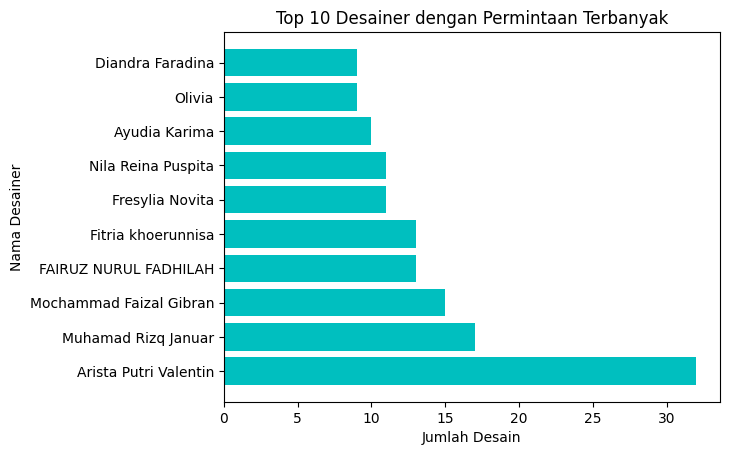

In [67]:
# Membalik urutan untuk barh (horizontal bar)
top_designer = top_10_designer.sort_values(by='jumlah_permintaan', ascending=False)

# Membuat bar plot horizontal
plt.barh(top_10_designer['user_name'], top_10_designer['jumlah_permintaan'], color='c')

# Menambahkan judul dan label
plt.title("Top 10 Desainer dengan Permintaan Terbanyak")
plt.xlabel("Jumlah Desain")
plt.ylabel("Nama Desainer")

# Menampilkan plot
plt.show()

Berdasarkan grafik di atas, desainer yang bernama `Arista Putri Valentin` memiliki total permintaan paling banyak yaitu 32. Namun terdapat beberapa desainer yang memiliki jumlah permintaan yang sama.

#### Total Order 

In [68]:
query_total_order = """
SELECT
    COUNT(id_order) AS total_order
FROM(
	SELECT 
    order_design.id_order,
    order_design.id_user,
    category_size.id_category,
    order_design.id_design_finish,
    category_design.id_category_design,
    user.name AS user_name,
    user.status AS user_status,
    design.design_name,
    design.status AS design_status,
    CASE
    	WHEN category_size.id_category = 1 THEN '< 10m^2'
		WHEN category_size.id_category = 2 THEN '11 - 20m^2'
   		WHEN category_size.id_category = 3 THEN '21 - 30m^2'
   		WHEN category_size.id_category = 4 THEN '31 - 40m^2'
   		WHEN category_size.id_category = 5 THEN '41 - 50m^2'
   		ELSE '> 50m^2'
   	END AS category_size,
   	category_design.name AS category_name,
   	order_design.status AS order_status,
   	order_design.price,
   	promo_code.code AS promo_code,
   	promo_code.valid_from,
   	promo_code.valid_until,
   	order_design.created_at,
   	order_design.updated_at,
    CASE
    	WHEN address_components.administrative_area_level_1 IN ('Daerah Khusus Ibukota Jakarta','Jakarta') THEN 'Daerah Khusus Ibukota Jakarta'
        WHEN address_components.administrative_area_level_1 = 'Banten' THEN 'Banten'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Barat', 'West Java') THEN 'Jawa Barat'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Timur', 'East Java') THEN 'Jawa Timur'
        WHEN address_components.administrative_area_level_1 = 'Bali' THEN 'Bali'
        WHEN address_components.administrative_area_level_1 = 'Sulawesi Selatan' THEN 'Sulawesi Selatan'
        WHEN address_components.administrative_area_level_1 IN ('Sumatera Utara', 'North Sumatra') THEN 'Sumatera Utara'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Tengah', 'Central Java') THEN 'Jawa Tengah'
        WHEN address_components.administrative_area_level_1 = 'Daerah Istimewa Yogyakarta' THEN 'Daerah Istimewa Yogyakarta'
        WHEN address_components.administrative_area_level_1 = 'Jambi' THEN 'Jambi'
        WHEN address_components.administrative_area_level_1 = 'Lampung' THEN 'Lampung'
        WHEN address_components.administrative_area_level_1 = 'Aceh' THEN 'Aceh'
        WHEN address_components.administrative_area_level_1 IN ('Sumatera Barat', 'West Sumatra') THEN 'Sumatera Barat'
        WHEN address_components.administrative_area_level_1 = 'Federal District' THEN 'Federal District'
        WHEN address_components.administrative_area_level_1 = '' OR address_components.administrative_area_level_1 IS NULL THEN 'Unknown Location'
        ELSE address_components.administrative_area_level_1
  	END AS province,
    CASE
        WHEN address_components.administrative_area_level_2 IN ('Badung', 'Badung Regency') THEN 'Badung'
        WHEN address_components.administrative_area_level_2 IN ('Bandung', 'Bandung Regency') THEN 'Bandung'
        WHEN address_components.administrative_area_level_2 IN ('Banyumas', 'Banyumas Regency') THEN 'Banyumas'
        WHEN address_components.administrative_area_level_2 IN ('Bekasi', 'Bekasi Regency') THEN 'Bekasi'
        WHEN address_components.administrative_area_level_2 IN ('Bogor', 'Bogor Regency') THEN 'Bogor'
        WHEN address_components.administrative_area_level_2 IN ('Central Jakarta City', 'Jakarta Pusat') THEN 'Jakarta Pusat'
        WHEN address_components.administrative_area_level_2 IN ('Ciamis', 'Ciamis Regency') THEN 'Ciamis'
        WHEN address_components.administrative_area_level_2 IN ('Cimahi', 'Cimahi City') THEN 'Cimahi'
        WHEN address_components.administrative_area_level_2 IN ('Deli Serdang', 'Deli Serdang Regency') THEN 'Deli Serdang'
        WHEN address_components.administrative_area_level_2 IN ('Depok', 'Depok City') THEN 'Depok'
        WHEN address_components.administrative_area_level_2 IN ('East Jakarta City', 'Jakarta Timur') THEN 'Jakarta Timur'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Barat', 'West Jakarta City') THEN 'Jakarta Barat'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Selatan', 'South Jakarta City') THEN 'Jakarta Selatan'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Utara', 'North Jakarta City') THEN 'Jakarta Utara'
        WHEN address_components.administrative_area_level_2 IN ('Jember', 'Jember Regency') THEN 'Jember'
        WHEN address_components.administrative_area_level_2 IN ('Klungkung', 'Klungkung Regency') THEN 'Klungkung'
        WHEN address_components.administrative_area_level_2 IN ('Pringsewu', 'Pringsewu Regency') THEN 'Pringsewu'
        WHEN address_components.administrative_area_level_2 IN ('Sukabumi', 'Sukabumi City') THEN 'Sukabumi'
        WHEN address_components.administrative_area_level_2 IN ('Tangerang', 'Tangerang City', 'Tangerang Regency') THEN 'Tangerang'
        WHEN address_components.administrative_area_level_2 IN ('Tangerang Selatan', 'South Tangerang City') THEN 'Tangerang Selatan'
        WHEN address_components.administrative_area_level_2 IN ('West Bandung', 'West Bandung Regency') THEN 'Bandung Barat'
        WHEN address_components.administrative_area_level_2 = ' ' THEN 'Unknown City'
        ELSE address_components.administrative_area_level_2
    END AS city,
    CASE
        WHEN address_components.administrative_area_level_3 IN ('South Kuta') THEN 'Kuta Selatan'
        WHEN address_components.administrative_area_level_3 = ' ' THEN 'Unknown District'
        ELSE address_components.administrative_area_level_3
    END AS district
    FROM
    	order_design
    LEFT JOIN
    	user ON user.id_user = order_design.id_designer
    LEFT JOIN
    	category_size ON category_size.id_category = order_design.id_category
    LEFT JOIN
    	design ON design.id_design = order_design.id_design_finish
    LEFT JOIN
    	category_design ON category_design.id_category_design = design.id_type
    LEFT JOIN
    	address_components ON address_components.address_componentable_id = order_design.id_order
    LEFT JOIN 
        promo_code ON promo_code.id_promo = order_design.id_promo
    WHERE 
    	order_design.id_user > 249
    AND
    	order_design.status NOT IN ('expired','new')
) AS master_table;
"""

In [69]:
total_order = fetch_data(host, port, user, passwd, databs, query_total_order)
total_order

,total_order
0,359


#### Tren Order Berdasarkan Bulan 

In [70]:
query_tren_order_per_bulan = """  
SELECT 
    COUNT(id_order) AS total_order,
    DATE_FORMAT(created_at, '%M') AS nama_bulan
FROM(
	SELECT 
    order_design.id_order,
    order_design.id_user,
    category_size.id_category,
    order_design.id_design_finish,
    category_design.id_category_design,
    user.name AS user_name,
    user.status AS user_status,
    design.design_name,
    design.status AS design_status,
    CASE
    	WHEN category_size.id_category = 1 THEN '< 10m^2'
		WHEN category_size.id_category = 2 THEN '11 - 20m^2'
   		WHEN category_size.id_category = 3 THEN '21 - 30m^2'
   		WHEN category_size.id_category = 4 THEN '31 - 40m^2'
   		WHEN category_size.id_category = 5 THEN '41 - 50m^2'
   		ELSE '> 50m^2'
   	END AS category_size,
   	category_design.name AS category_name,
   	order_design.status AS order_status,
   	order_design.price,
   	promo_code.code AS promo_code,
   	promo_code.valid_from,
   	promo_code.valid_until,
   	order_design.created_at,
   	order_design.updated_at,
    CASE
    	WHEN address_components.administrative_area_level_1 IN ('Daerah Khusus Ibukota Jakarta','Jakarta') THEN 'Daerah Khusus Ibukota Jakarta'
        WHEN address_components.administrative_area_level_1 = 'Banten' THEN 'Banten'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Barat', 'West Java') THEN 'Jawa Barat'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Timur', 'East Java') THEN 'Jawa Timur'
        WHEN address_components.administrative_area_level_1 = 'Bali' THEN 'Bali'
        WHEN address_components.administrative_area_level_1 = 'Sulawesi Selatan' THEN 'Sulawesi Selatan'
        WHEN address_components.administrative_area_level_1 IN ('Sumatera Utara', 'North Sumatra') THEN 'Sumatera Utara'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Tengah', 'Central Java') THEN 'Jawa Tengah'
        WHEN address_components.administrative_area_level_1 = 'Daerah Istimewa Yogyakarta' THEN 'Daerah Istimewa Yogyakarta'
        WHEN address_components.administrative_area_level_1 = 'Jambi' THEN 'Jambi'
        WHEN address_components.administrative_area_level_1 = 'Lampung' THEN 'Lampung'
        WHEN address_components.administrative_area_level_1 = 'Aceh' THEN 'Aceh'
        WHEN address_components.administrative_area_level_1 IN ('Sumatera Barat', 'West Sumatra') THEN 'Sumatera Barat'
        WHEN address_components.administrative_area_level_1 = 'Federal District' THEN 'Federal District'
        WHEN address_components.administrative_area_level_1 = '' OR address_components.administrative_area_level_1 IS NULL THEN 'Unknown Location'
        ELSE address_components.administrative_area_level_1
  	END AS province,
    CASE
        WHEN address_components.administrative_area_level_2 IN ('Badung', 'Badung Regency') THEN 'Badung'
        WHEN address_components.administrative_area_level_2 IN ('Bandung', 'Bandung Regency') THEN 'Bandung'
        WHEN address_components.administrative_area_level_2 IN ('Banyumas', 'Banyumas Regency') THEN 'Banyumas'
        WHEN address_components.administrative_area_level_2 IN ('Bekasi', 'Bekasi Regency') THEN 'Bekasi'
        WHEN address_components.administrative_area_level_2 IN ('Bogor', 'Bogor Regency') THEN 'Bogor'
        WHEN address_components.administrative_area_level_2 IN ('Central Jakarta City', 'Jakarta Pusat') THEN 'Jakarta Pusat'
        WHEN address_components.administrative_area_level_2 IN ('Ciamis', 'Ciamis Regency') THEN 'Ciamis'
        WHEN address_components.administrative_area_level_2 IN ('Cimahi', 'Cimahi City') THEN 'Cimahi'
        WHEN address_components.administrative_area_level_2 IN ('Deli Serdang', 'Deli Serdang Regency') THEN 'Deli Serdang'
        WHEN address_components.administrative_area_level_2 IN ('Depok', 'Depok City') THEN 'Depok'
        WHEN address_components.administrative_area_level_2 IN ('East Jakarta City', 'Jakarta Timur') THEN 'Jakarta Timur'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Barat', 'West Jakarta City') THEN 'Jakarta Barat'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Selatan', 'South Jakarta City') THEN 'Jakarta Selatan'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Utara', 'North Jakarta City') THEN 'Jakarta Utara'
        WHEN address_components.administrative_area_level_2 IN ('Jember', 'Jember Regency') THEN 'Jember'
        WHEN address_components.administrative_area_level_2 IN ('Klungkung', 'Klungkung Regency') THEN 'Klungkung'
        WHEN address_components.administrative_area_level_2 IN ('Pringsewu', 'Pringsewu Regency') THEN 'Pringsewu'
        WHEN address_components.administrative_area_level_2 IN ('Sukabumi', 'Sukabumi City') THEN 'Sukabumi'
        WHEN address_components.administrative_area_level_2 IN ('Tangerang', 'Tangerang City', 'Tangerang Regency') THEN 'Tangerang'
        WHEN address_components.administrative_area_level_2 IN ('Tangerang Selatan', 'South Tangerang City') THEN 'Tangerang Selatan'
        WHEN address_components.administrative_area_level_2 IN ('West Bandung', 'West Bandung Regency') THEN 'Bandung Barat'
        WHEN address_components.administrative_area_level_2 = ' ' THEN 'Unknown City'
        ELSE address_components.administrative_area_level_2
    END AS city,
    CASE
        WHEN address_components.administrative_area_level_3 IN ('South Kuta') THEN 'Kuta Selatan'
        WHEN address_components.administrative_area_level_3 = ' ' THEN 'Unknown District'
        ELSE address_components.administrative_area_level_3
    END AS district
    FROM
    	order_design
    LEFT JOIN
    	user ON user.id_user = order_design.id_designer
    LEFT JOIN
    	category_size ON category_size.id_category = order_design.id_category
    LEFT JOIN
    	design ON design.id_design = order_design.id_design_finish
    LEFT JOIN
    	category_design ON category_design.id_category_design = design.id_type
    LEFT JOIN
    	address_components ON address_components.address_componentable_id = order_design.id_order
    LEFT JOIN 
        promo_code ON promo_code.id_promo = order_design.id_promo
    WHERE 
    	order_design.id_user > 249
    AND
    	order_design.status NOT IN ('expired','new')
) AS master_table
GROUP BY 
    nama_bulan
ORDER BY 
    created_at;
"""

In [71]:
tren_order_per_bulan = fetch_data(host, port, user, passwd, databs, query_tren_order_per_bulan)
tren_order_per_bulan

,total_order,nama_bulan
0,17,April
1,37,May
2,47,June
3,56,July
4,88,August
5,59,September
6,32,October
7,23,November


In [72]:
fig = px.line(tren_order_per_bulan, x="nama_bulan", y="total_order", title="Tren Total Order Per Bulan", markers=True)
fig.update_xaxes(title="Nama Bulan")
fig.update_yaxes(title="Total Order")
fig.show()

Berdasarkan grafik di atas, tren order dari bulan `April` hingga `Agustus` meningkat. Puncaknya pada bulan `Agustus` dengan total order sebanyak *88* dan terendahnya pada bulan `April` sebanyak *17*. Namun setelahnya dari bulan `Agustus` hinga `November` menurun.

#### Total Order Dalam Proses

In [73]:
query_total_order_dalam_proses = """  
SELECT
    order_status,
    COUNT(*) AS total_order
FROM(
	SELECT 
    order_design.id_order,
    order_design.id_user,
    category_size.id_category,
    order_design.id_design_finish,
    category_design.id_category_design,
    user.name AS user_name,
    user.status AS user_status,
    design.design_name,
    design.status AS design_status,
    CASE
    	WHEN category_size.id_category = 1 THEN '< 10m^2'
		WHEN category_size.id_category = 2 THEN '11 - 20m^2'
   		WHEN category_size.id_category = 3 THEN '21 - 30m^2'
   		WHEN category_size.id_category = 4 THEN '31 - 40m^2'
   		WHEN category_size.id_category = 5 THEN '41 - 50m^2'
   		ELSE '> 50m^2'
   	END AS category_size,
   	category_design.name AS category_name,
   	order_design.status AS order_status,
   	order_design.price,
   	promo_code.code AS promo_code,
   	promo_code.valid_from,
   	promo_code.valid_until,
   	order_design.created_at,
   	order_design.updated_at,
    CASE
    	WHEN address_components.administrative_area_level_1 IN ('Daerah Khusus Ibukota Jakarta','Jakarta') THEN 'Daerah Khusus Ibukota Jakarta'
        WHEN address_components.administrative_area_level_1 = 'Banten' THEN 'Banten'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Barat', 'West Java') THEN 'Jawa Barat'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Timur', 'East Java') THEN 'Jawa Timur'
        WHEN address_components.administrative_area_level_1 = 'Bali' THEN 'Bali'
        WHEN address_components.administrative_area_level_1 = 'Sulawesi Selatan' THEN 'Sulawesi Selatan'
        WHEN address_components.administrative_area_level_1 IN ('Sumatera Utara', 'North Sumatra') THEN 'Sumatera Utara'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Tengah', 'Central Java') THEN 'Jawa Tengah'
        WHEN address_components.administrative_area_level_1 = 'Daerah Istimewa Yogyakarta' THEN 'Daerah Istimewa Yogyakarta'
        WHEN address_components.administrative_area_level_1 = 'Jambi' THEN 'Jambi'
        WHEN address_components.administrative_area_level_1 = 'Lampung' THEN 'Lampung'
        WHEN address_components.administrative_area_level_1 = 'Aceh' THEN 'Aceh'
        WHEN address_components.administrative_area_level_1 IN ('Sumatera Barat', 'West Sumatra') THEN 'Sumatera Barat'
        WHEN address_components.administrative_area_level_1 = 'Federal District' THEN 'Federal District'
        WHEN address_components.administrative_area_level_1 = '' OR address_components.administrative_area_level_1 IS NULL THEN 'Unknown Location'
        ELSE address_components.administrative_area_level_1
  	END AS province,
    CASE
        WHEN address_components.administrative_area_level_2 IN ('Badung', 'Badung Regency') THEN 'Badung'
        WHEN address_components.administrative_area_level_2 IN ('Bandung', 'Bandung Regency') THEN 'Bandung'
        WHEN address_components.administrative_area_level_2 IN ('Banyumas', 'Banyumas Regency') THEN 'Banyumas'
        WHEN address_components.administrative_area_level_2 IN ('Bekasi', 'Bekasi Regency') THEN 'Bekasi'
        WHEN address_components.administrative_area_level_2 IN ('Bogor', 'Bogor Regency') THEN 'Bogor'
        WHEN address_components.administrative_area_level_2 IN ('Central Jakarta City', 'Jakarta Pusat') THEN 'Jakarta Pusat'
        WHEN address_components.administrative_area_level_2 IN ('Ciamis', 'Ciamis Regency') THEN 'Ciamis'
        WHEN address_components.administrative_area_level_2 IN ('Cimahi', 'Cimahi City') THEN 'Cimahi'
        WHEN address_components.administrative_area_level_2 IN ('Deli Serdang', 'Deli Serdang Regency') THEN 'Deli Serdang'
        WHEN address_components.administrative_area_level_2 IN ('Depok', 'Depok City') THEN 'Depok'
        WHEN address_components.administrative_area_level_2 IN ('East Jakarta City', 'Jakarta Timur') THEN 'Jakarta Timur'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Barat', 'West Jakarta City') THEN 'Jakarta Barat'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Selatan', 'South Jakarta City') THEN 'Jakarta Selatan'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Utara', 'North Jakarta City') THEN 'Jakarta Utara'
        WHEN address_components.administrative_area_level_2 IN ('Jember', 'Jember Regency') THEN 'Jember'
        WHEN address_components.administrative_area_level_2 IN ('Klungkung', 'Klungkung Regency') THEN 'Klungkung'
        WHEN address_components.administrative_area_level_2 IN ('Pringsewu', 'Pringsewu Regency') THEN 'Pringsewu'
        WHEN address_components.administrative_area_level_2 IN ('Sukabumi', 'Sukabumi City') THEN 'Sukabumi'
        WHEN address_components.administrative_area_level_2 IN ('Tangerang', 'Tangerang City', 'Tangerang Regency') THEN 'Tangerang'
        WHEN address_components.administrative_area_level_2 IN ('Tangerang Selatan', 'South Tangerang City') THEN 'Tangerang Selatan'
        WHEN address_components.administrative_area_level_2 IN ('West Bandung', 'West Bandung Regency') THEN 'Bandung Barat'
        WHEN address_components.administrative_area_level_2 = ' ' THEN 'Unknown City'
        ELSE address_components.administrative_area_level_2
    END AS city,
    CASE
        WHEN address_components.administrative_area_level_3 IN ('South Kuta') THEN 'Kuta Selatan'
        WHEN address_components.administrative_area_level_3 = ' ' THEN 'Unknown District'
        ELSE address_components.administrative_area_level_3
    END AS district
    FROM
    	order_design
    LEFT JOIN
    	user ON user.id_user = order_design.id_designer
    LEFT JOIN
    	category_size ON category_size.id_category = order_design.id_category
    LEFT JOIN
    	design ON design.id_design = order_design.id_design_finish
    LEFT JOIN
    	category_design ON category_design.id_category_design = design.id_type
    LEFT JOIN
    	address_components ON address_components.address_componentable_id = order_design.id_order
    LEFT JOIN 
        promo_code ON promo_code.id_promo = order_design.id_promo
    WHERE 
    	order_design.id_user > 249
    AND
    	order_design.status IN ('paid','wait_freelancer','on_going','in_review_internal','in_review')
) AS master_table
GROUP BY 
	order_status;
"""

In [75]:
total_order_dalam_proses = fetch_data(host, port, user, passwd, databs, query_total_order_dalam_proses)
total_order_dalam_proses

,order_status,total_order
0,in_review,151
1,in_review_internal,25
2,on_going,24
3,paid,31
4,wait_freelancer,6


In [77]:
fig = px.bar(total_order_dalam_proses, x="order_status", y="total_order", title="Total Order Dalam Proses")
fig.update_xaxes(title="Status")
fig.update_yaxes(title="Total Order")
fig.show()

Berdasarkan grafik tersebut, dapat diketahui bahwa jumlah order yang statusnya (`in_review`/customer review) adalah sebanyak 151, (`in_review_internal`/designer submit design) sebanyak 25, `on_going` sebanyak 24, (`paid`/sudah dibayar) sebanyak 31, dan `wait_freelancer` sebanyak 6. Hal ini berarti design sebagian besar sudah dibuat dan hanya menunggu review atau feedback dari customer. 

#### Total Order Berdasarkan Ukuran 

In [78]:
query_total_order_berdasarkan_ukuran = """  
SELECT
    category_size,
    COUNT(id_order) AS total_order
FROM(
	SELECT 
    order_design.id_order,
    order_design.id_user,
    category_size.id_category,
    order_design.id_design_finish,
    category_design.id_category_design,
    user.name AS user_name,
    user.status AS user_status,
    design.design_name,
    design.status AS design_status,
    CASE
    	WHEN category_size.id_category = 1 THEN '< 10m^2'
		WHEN category_size.id_category = 2 THEN '11 - 20m^2'
   		WHEN category_size.id_category = 3 THEN '21 - 30m^2'
   		WHEN category_size.id_category = 4 THEN '31 - 40m^2'
   		WHEN category_size.id_category = 5 THEN '41 - 50m^2'
   		ELSE '> 50m^2'
   	END AS category_size,
   	category_design.name AS category_name,
   	order_design.status AS order_status,
   	order_design.price,
   	promo_code.code AS promo_code,
   	promo_code.valid_from,
   	promo_code.valid_until,
   	order_design.created_at,
   	order_design.updated_at,
    CASE
    	WHEN address_components.administrative_area_level_1 IN ('Daerah Khusus Ibukota Jakarta','Jakarta') THEN 'Daerah Khusus Ibukota Jakarta'
        WHEN address_components.administrative_area_level_1 = 'Banten' THEN 'Banten'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Barat', 'West Java') THEN 'Jawa Barat'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Timur', 'East Java') THEN 'Jawa Timur'
        WHEN address_components.administrative_area_level_1 = 'Bali' THEN 'Bali'
        WHEN address_components.administrative_area_level_1 = 'Sulawesi Selatan' THEN 'Sulawesi Selatan'
        WHEN address_components.administrative_area_level_1 IN ('Sumatera Utara', 'North Sumatra') THEN 'Sumatera Utara'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Tengah', 'Central Java') THEN 'Jawa Tengah'
        WHEN address_components.administrative_area_level_1 = 'Daerah Istimewa Yogyakarta' THEN 'Daerah Istimewa Yogyakarta'
        WHEN address_components.administrative_area_level_1 = 'Jambi' THEN 'Jambi'
        WHEN address_components.administrative_area_level_1 = 'Lampung' THEN 'Lampung'
        WHEN address_components.administrative_area_level_1 = 'Aceh' THEN 'Aceh'
        WHEN address_components.administrative_area_level_1 IN ('Sumatera Barat', 'West Sumatra') THEN 'Sumatera Barat'
        WHEN address_components.administrative_area_level_1 = 'Federal District' THEN 'Federal District'
        WHEN address_components.administrative_area_level_1 = '' OR address_components.administrative_area_level_1 IS NULL THEN 'Unknown Location'
        ELSE address_components.administrative_area_level_1
  	END AS province,
    CASE
        WHEN address_components.administrative_area_level_2 IN ('Badung', 'Badung Regency') THEN 'Badung'
        WHEN address_components.administrative_area_level_2 IN ('Bandung', 'Bandung Regency') THEN 'Bandung'
        WHEN address_components.administrative_area_level_2 IN ('Banyumas', 'Banyumas Regency') THEN 'Banyumas'
        WHEN address_components.administrative_area_level_2 IN ('Bekasi', 'Bekasi Regency') THEN 'Bekasi'
        WHEN address_components.administrative_area_level_2 IN ('Bogor', 'Bogor Regency') THEN 'Bogor'
        WHEN address_components.administrative_area_level_2 IN ('Central Jakarta City', 'Jakarta Pusat') THEN 'Jakarta Pusat'
        WHEN address_components.administrative_area_level_2 IN ('Ciamis', 'Ciamis Regency') THEN 'Ciamis'
        WHEN address_components.administrative_area_level_2 IN ('Cimahi', 'Cimahi City') THEN 'Cimahi'
        WHEN address_components.administrative_area_level_2 IN ('Deli Serdang', 'Deli Serdang Regency') THEN 'Deli Serdang'
        WHEN address_components.administrative_area_level_2 IN ('Depok', 'Depok City') THEN 'Depok'
        WHEN address_components.administrative_area_level_2 IN ('East Jakarta City', 'Jakarta Timur') THEN 'Jakarta Timur'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Barat', 'West Jakarta City') THEN 'Jakarta Barat'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Selatan', 'South Jakarta City') THEN 'Jakarta Selatan'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Utara', 'North Jakarta City') THEN 'Jakarta Utara'
        WHEN address_components.administrative_area_level_2 IN ('Jember', 'Jember Regency') THEN 'Jember'
        WHEN address_components.administrative_area_level_2 IN ('Klungkung', 'Klungkung Regency') THEN 'Klungkung'
        WHEN address_components.administrative_area_level_2 IN ('Pringsewu', 'Pringsewu Regency') THEN 'Pringsewu'
        WHEN address_components.administrative_area_level_2 IN ('Sukabumi', 'Sukabumi City') THEN 'Sukabumi'
        WHEN address_components.administrative_area_level_2 IN ('Tangerang', 'Tangerang City', 'Tangerang Regency') THEN 'Tangerang'
        WHEN address_components.administrative_area_level_2 IN ('Tangerang Selatan', 'South Tangerang City') THEN 'Tangerang Selatan'
        WHEN address_components.administrative_area_level_2 IN ('West Bandung', 'West Bandung Regency') THEN 'Bandung Barat'
        WHEN address_components.administrative_area_level_2 = ' ' THEN 'Unknown City'
        ELSE address_components.administrative_area_level_2
    END AS city,
    CASE
        WHEN address_components.administrative_area_level_3 IN ('South Kuta') THEN 'Kuta Selatan'
        WHEN address_components.administrative_area_level_3 = ' ' THEN 'Unknown District'
        ELSE address_components.administrative_area_level_3
    END AS district
    FROM
    	order_design
    LEFT JOIN
    	user ON user.id_user = order_design.id_designer
    LEFT JOIN
    	category_size ON category_size.id_category = order_design.id_category
    LEFT JOIN
    	design ON design.id_design = order_design.id_design_finish
    LEFT JOIN
    	category_design ON category_design.id_category_design = design.id_type
    LEFT JOIN
    	address_components ON address_components.address_componentable_id = order_design.id_order
    LEFT JOIN 
        promo_code ON promo_code.id_promo = order_design.id_promo
    WHERE 
    	order_design.id_user > 249
    AND
    	order_design.status NOT IN ('expired','new')
) AS master_table
GROUP BY 
	category_size
ORDER BY
	total_order DESC;
"""

In [79]:
total_order_berdasarkan_ukuran = fetch_data(host, port, user, passwd, databs, query_total_order_berdasarkan_ukuran)
total_order_berdasarkan_ukuran

,category_size,total_order
0,< 10m^2,162
1,11 - 20m^2,95
2,> 50m^2,39
3,21 - 30m^2,32
4,31 - 40m^2,16
5,41 - 50m^2,15


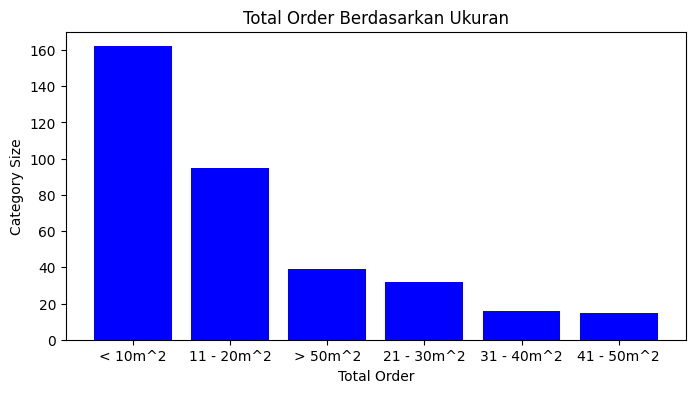

In [80]:
# Membuat bar plot
plt.figure(figsize=(8, 4))
plt.bar(total_order_berdasarkan_ukuran['category_size'],total_order_berdasarkan_ukuran['total_order'], color='blue')

# Menambahkan judul dan label
plt.title("Total Order Berdasarkan Ukuran")
plt.xlabel("Total Order")
plt.ylabel("Category Size")

# Menampilkan plot
plt.show()

#### Total Desain yang Dibuat 

In [81]:
query_jumlah_design = """  
SELECT 
    COUNT(id_design_finish) AS jumlah_desain_terbuat
from(
	SELECT 
    order_design.id_order,
    order_design.id_user,
    category_size.id_category,
    order_design.id_design_finish,
    category_design.id_category_design,
    user.name AS user_name,
    user.status AS user_status,
    design.design_name,
    design.status AS design_status,
    CASE
    	WHEN category_size.id_category = 1 THEN '< 10m^2'
		WHEN category_size.id_category = 2 THEN '11 - 20m^2'
   		WHEN category_size.id_category = 3 THEN '21 - 30m^2'
   		WHEN category_size.id_category = 4 THEN '31 - 40m^2'
   		WHEN category_size.id_category = 5 THEN '41 - 50m^2'
   		ELSE '> 50m^2'
   	END AS category_size,
   	category_design.name AS category_name,
   	order_design.status AS order_status,
   	order_design.price,
   	promo_code.code AS promo_code,
   	promo_code.valid_from,
   	promo_code.valid_until,
   	order_design.created_at,
   	order_design.updated_at,
    CASE
    	WHEN address_components.administrative_area_level_1 IN ('Daerah Khusus Ibukota Jakarta','Jakarta') THEN 'Daerah Khusus Ibukota Jakarta'
        WHEN address_components.administrative_area_level_1 = 'Banten' THEN 'Banten'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Barat', 'West Java') THEN 'Jawa Barat'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Timur', 'East Java') THEN 'Jawa Timur'
        WHEN address_components.administrative_area_level_1 = 'Bali' THEN 'Bali'
        WHEN address_components.administrative_area_level_1 = 'Sulawesi Selatan' THEN 'Sulawesi Selatan'
        WHEN address_components.administrative_area_level_1 IN ('Sumatera Utara', 'North Sumatra') THEN 'Sumatera Utara'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Tengah', 'Central Java') THEN 'Jawa Tengah'
        WHEN address_components.administrative_area_level_1 = 'Daerah Istimewa Yogyakarta' THEN 'Daerah Istimewa Yogyakarta'
        WHEN address_components.administrative_area_level_1 = 'Jambi' THEN 'Jambi'
        WHEN address_components.administrative_area_level_1 = 'Lampung' THEN 'Lampung'
        WHEN address_components.administrative_area_level_1 = 'Aceh' THEN 'Aceh'
        WHEN address_components.administrative_area_level_1 IN ('Sumatera Barat', 'West Sumatra') THEN 'Sumatera Barat'
        WHEN address_components.administrative_area_level_1 = 'Federal District' THEN 'Federal District'
        WHEN address_components.administrative_area_level_1 = '' OR address_components.administrative_area_level_1 IS NULL THEN 'Unknown Location'
        ELSE address_components.administrative_area_level_1
  	END AS province,
    CASE
        WHEN address_components.administrative_area_level_2 IN ('Badung', 'Badung Regency') THEN 'Badung'
        WHEN address_components.administrative_area_level_2 IN ('Bandung', 'Bandung Regency') THEN 'Bandung'
        WHEN address_components.administrative_area_level_2 IN ('Banyumas', 'Banyumas Regency') THEN 'Banyumas'
        WHEN address_components.administrative_area_level_2 IN ('Bekasi', 'Bekasi Regency') THEN 'Bekasi'
        WHEN address_components.administrative_area_level_2 IN ('Bogor', 'Bogor Regency') THEN 'Bogor'
        WHEN address_components.administrative_area_level_2 IN ('Central Jakarta City', 'Jakarta Pusat') THEN 'Jakarta Pusat'
        WHEN address_components.administrative_area_level_2 IN ('Ciamis', 'Ciamis Regency') THEN 'Ciamis'
        WHEN address_components.administrative_area_level_2 IN ('Cimahi', 'Cimahi City') THEN 'Cimahi'
        WHEN address_components.administrative_area_level_2 IN ('Deli Serdang', 'Deli Serdang Regency') THEN 'Deli Serdang'
        WHEN address_components.administrative_area_level_2 IN ('Depok', 'Depok City') THEN 'Depok'
        WHEN address_components.administrative_area_level_2 IN ('East Jakarta City', 'Jakarta Timur') THEN 'Jakarta Timur'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Barat', 'West Jakarta City') THEN 'Jakarta Barat'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Selatan', 'South Jakarta City') THEN 'Jakarta Selatan'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Utara', 'North Jakarta City') THEN 'Jakarta Utara'
        WHEN address_components.administrative_area_level_2 IN ('Jember', 'Jember Regency') THEN 'Jember'
        WHEN address_components.administrative_area_level_2 IN ('Klungkung', 'Klungkung Regency') THEN 'Klungkung'
        WHEN address_components.administrative_area_level_2 IN ('Pringsewu', 'Pringsewu Regency') THEN 'Pringsewu'
        WHEN address_components.administrative_area_level_2 IN ('Sukabumi', 'Sukabumi City') THEN 'Sukabumi'
        WHEN address_components.administrative_area_level_2 IN ('Tangerang', 'Tangerang City', 'Tangerang Regency') THEN 'Tangerang'
        WHEN address_components.administrative_area_level_2 IN ('Tangerang Selatan', 'South Tangerang City') THEN 'Tangerang Selatan'
        WHEN address_components.administrative_area_level_2 IN ('West Bandung', 'West Bandung Regency') THEN 'Bandung Barat'
        WHEN address_components.administrative_area_level_2 = ' ' THEN 'Unknown City'
        ELSE address_components.administrative_area_level_2
    END AS city,
    CASE
        WHEN address_components.administrative_area_level_3 IN ('South Kuta') THEN 'Kuta Selatan'
        WHEN address_components.administrative_area_level_3 = ' ' THEN 'Unknown District'
        ELSE address_components.administrative_area_level_3
    END AS district
    FROM
    	order_design
    LEFT JOIN
    	user ON user.id_user = order_design.id_designer
    LEFT JOIN
    	category_size ON category_size.id_category = order_design.id_category
    LEFT JOIN
    	design ON design.id_design = order_design.id_design_finish
    LEFT JOIN
    	category_design ON category_design.id_category_design = design.id_type
    LEFT JOIN
    	address_components ON address_components.address_componentable_id = order_design.id_order
    LEFT JOIN 
        promo_code ON promo_code.id_promo = order_design.id_promo
    WHERE 
    	order_design.id_user > 249
    AND
    	order_design.status = 'finish'
) AS master_table;
"""

In [82]:
jumlah_desain_yang_dibuat = fetch_data(host, port, user, passwd, databs, query_jumlah_design)
jumlah_desain_yang_dibuat

,jumlah_desain_terbuat
0,121


#### Total Order Berdasarkan Provinsi

In [85]:
query_total_order_berdasarkan_provinsi = """  
SELECT 
	province,
	COUNT(id_order) AS jumlah_order
FROM(
	SELECT 
    order_design.id_order,
    order_design.id_user,
    category_size.id_category,
    order_design.id_design_finish,
    category_design.id_category_design,
    user.name AS user_name,
    user.status AS user_status,
    design.design_name,
    design.status AS design_status,
    CASE
    	WHEN category_size.id_category = 1 THEN '< 10m^2'
		WHEN category_size.id_category = 2 THEN '11 - 20m^2'
   		WHEN category_size.id_category = 3 THEN '21 - 30m^2'
   		WHEN category_size.id_category = 4 THEN '31 - 40m^2'
   		WHEN category_size.id_category = 5 THEN '41 - 50m^2'
   		ELSE '> 50m^2'
   	END AS category_size,
   	category_design.name AS category_name,
   	order_design.status AS order_status,
   	order_design.price,
   	promo_code.code AS promo_code,
   	promo_code.valid_from,
   	promo_code.valid_until,
   	order_design.created_at,
   	order_design.updated_at,
    CASE
    	WHEN address_components.administrative_area_level_1 IN ('Daerah Khusus Ibukota Jakarta','Jakarta') THEN 'Daerah Khusus Ibukota Jakarta'
        WHEN address_components.administrative_area_level_1 = 'Banten' THEN 'Banten'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Barat', 'West Java') THEN 'Jawa Barat'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Timur', 'East Java') THEN 'Jawa Timur'
        WHEN address_components.administrative_area_level_1 = 'Bali' THEN 'Bali'
        WHEN address_components.administrative_area_level_1 = 'Sulawesi Selatan' THEN 'Sulawesi Selatan'
        WHEN address_components.administrative_area_level_1 IN ('Sumatera Utara', 'North Sumatra') THEN 'Sumatera Utara'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Tengah', 'Central Java') THEN 'Jawa Tengah'
        WHEN address_components.administrative_area_level_1 = 'Daerah Istimewa Yogyakarta' THEN 'Daerah Istimewa Yogyakarta'
        WHEN address_components.administrative_area_level_1 = 'Jambi' THEN 'Jambi'
        WHEN address_components.administrative_area_level_1 = 'Lampung' THEN 'Lampung'
        WHEN address_components.administrative_area_level_1 = 'Aceh' THEN 'Aceh'
        WHEN address_components.administrative_area_level_1 IN ('Sumatera Barat', 'West Sumatra') THEN 'Sumatera Barat'
        WHEN address_components.administrative_area_level_1 = 'Federal District' THEN 'Federal District'
        WHEN address_components.administrative_area_level_1 = '' OR address_components.administrative_area_level_1 IS NULL THEN 'Unknown Location'
        ELSE address_components.administrative_area_level_1
  	END AS province,
    CASE
        WHEN address_components.administrative_area_level_2 IN ('Badung', 'Badung Regency') THEN 'Badung'
        WHEN address_components.administrative_area_level_2 IN ('Bandung', 'Bandung Regency') THEN 'Bandung'
        WHEN address_components.administrative_area_level_2 IN ('Banyumas', 'Banyumas Regency') THEN 'Banyumas'
        WHEN address_components.administrative_area_level_2 IN ('Bekasi', 'Bekasi Regency') THEN 'Bekasi'
        WHEN address_components.administrative_area_level_2 IN ('Bogor', 'Bogor Regency') THEN 'Bogor'
        WHEN address_components.administrative_area_level_2 IN ('Central Jakarta City', 'Jakarta Pusat') THEN 'Jakarta Pusat'
        WHEN address_components.administrative_area_level_2 IN ('Ciamis', 'Ciamis Regency') THEN 'Ciamis'
        WHEN address_components.administrative_area_level_2 IN ('Cimahi', 'Cimahi City') THEN 'Cimahi'
        WHEN address_components.administrative_area_level_2 IN ('Deli Serdang', 'Deli Serdang Regency') THEN 'Deli Serdang'
        WHEN address_components.administrative_area_level_2 IN ('Depok', 'Depok City') THEN 'Depok'
        WHEN address_components.administrative_area_level_2 IN ('East Jakarta City', 'Jakarta Timur') THEN 'Jakarta Timur'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Barat', 'West Jakarta City') THEN 'Jakarta Barat'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Selatan', 'South Jakarta City') THEN 'Jakarta Selatan'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Utara', 'North Jakarta City') THEN 'Jakarta Utara'
        WHEN address_components.administrative_area_level_2 IN ('Jember', 'Jember Regency') THEN 'Jember'
        WHEN address_components.administrative_area_level_2 IN ('Klungkung', 'Klungkung Regency') THEN 'Klungkung'
        WHEN address_components.administrative_area_level_2 IN ('Pringsewu', 'Pringsewu Regency') THEN 'Pringsewu'
        WHEN address_components.administrative_area_level_2 IN ('Sukabumi', 'Sukabumi City') THEN 'Sukabumi'
        WHEN address_components.administrative_area_level_2 IN ('Tangerang', 'Tangerang City', 'Tangerang Regency') THEN 'Tangerang'
        WHEN address_components.administrative_area_level_2 IN ('Tangerang Selatan', 'South Tangerang City') THEN 'Tangerang Selatan'
        WHEN address_components.administrative_area_level_2 IN ('West Bandung', 'West Bandung Regency') THEN 'Bandung Barat'
        WHEN address_components.administrative_area_level_2 = ' ' THEN 'Unknown City'
        ELSE address_components.administrative_area_level_2
    END AS city,
    CASE
        WHEN address_components.administrative_area_level_3 IN ('South Kuta') THEN 'Kuta Selatan'
        WHEN address_components.administrative_area_level_3 = ' ' THEN 'Unknown District'
        ELSE address_components.administrative_area_level_3
    END AS district
    FROM
    	order_design
    LEFT JOIN
    	user ON user.id_user = order_design.id_designer
    LEFT JOIN
    	category_size ON category_size.id_category = order_design.id_category
    LEFT JOIN
    	design ON design.id_design = order_design.id_design_finish
    LEFT JOIN
    	category_design ON category_design.id_category_design = design.id_type
    LEFT JOIN
    	address_components ON address_components.address_componentable_id = order_design.id_order
    LEFT JOIN 
        promo_code ON promo_code.id_promo = order_design.id_promo
    WHERE 
    	order_design.id_user > 249
    AND
    	order_design.status NOT IN ('expired','new')
    AND 
		address_componentable_type like '%OrderDesign%'
) AS master_table
GROUP BY 
	province
ORDER BY
	jumlah_order DESC;
"""

In [86]:
total_order_berdasarkan_provinsi = fetch_data(host, port, user, passwd, databs, query_total_order_berdasarkan_provinsi)
total_order_berdasarkan_provinsi

,province,jumlah_order
0,Jawa Barat,60
1,Daerah Khusus Ibukota Jakarta,57
2,Banten,50
3,Jawa Timur,8
4,Sumatera Utara,7
5,Bali,5
6,Daerah Istimewa Yogyakarta,3
7,Jawa Tengah,2
8,Sulawesi Selatan,2
9,Jambi,1


In [87]:
fig = px.bar(total_order_berdasarkan_provinsi, x="province", y="jumlah_order", title="Total Order Berdasarkan Provinsi")
fig.update_xaxes(title="Province")
fig.update_yaxes(title="Jumlah Order")
fig.show()

Berdasarkan grafik di atas, total order terbanyak berasal dari provinsi `Jawa Barat` dengan jumlah 60 order. Diikuti dengan `DKI Jakarta` dengan jumlah 57 order dan `Banten` dengan jumlah 50 order. Provinsi dengan order paling sedikit adalah `Lampung, Jambi, Sumatera Utara, dan Federal District(Brazil)` dengan jumlah 1 order.

#### Total Order Berdasarkan Kota

In [90]:
query_total_order_berdasarkan_kota = """  
SELECT 
	city,
	COUNT(id_order) AS jumlah_order
FROM(
	SELECT 
    order_design.id_order,
    order_design.id_user,
    category_size.id_category,
    order_design.id_design_finish,
    category_design.id_category_design,
    user.name AS user_name,
    user.status AS user_status,
    design.design_name,
    design.status AS design_status,
    CASE
    	WHEN category_size.id_category = 1 THEN '< 10m^2'
		WHEN category_size.id_category = 2 THEN '11 - 20m^2'
   		WHEN category_size.id_category = 3 THEN '21 - 30m^2'
   		WHEN category_size.id_category = 4 THEN '31 - 40m^2'
   		WHEN category_size.id_category = 5 THEN '41 - 50m^2'
   		ELSE '> 50m^2'
   	END AS category_size,
   	category_design.name AS category_name,
   	order_design.status AS order_status,
   	order_design.price,
   	promo_code.code AS promo_code,
   	promo_code.valid_from,
   	promo_code.valid_until,
   	order_design.created_at,
   	order_design.updated_at,
    CASE
    	WHEN address_components.administrative_area_level_1 IN ('Daerah Khusus Ibukota Jakarta','Jakarta') THEN 'Daerah Khusus Ibukota Jakarta'
        WHEN address_components.administrative_area_level_1 = 'Banten' THEN 'Banten'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Barat', 'West Java') THEN 'Jawa Barat'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Timur', 'East Java') THEN 'Jawa Timur'
        WHEN address_components.administrative_area_level_1 = 'Bali' THEN 'Bali'
        WHEN address_components.administrative_area_level_1 = 'Sulawesi Selatan' THEN 'Sulawesi Selatan'
        WHEN address_components.administrative_area_level_1 IN ('Sumatera Utara', 'North Sumatra') THEN 'Sumatera Utara'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Tengah', 'Central Java') THEN 'Jawa Tengah'
        WHEN address_components.administrative_area_level_1 = 'Daerah Istimewa Yogyakarta' THEN 'Daerah Istimewa Yogyakarta'
        WHEN address_components.administrative_area_level_1 = 'Jambi' THEN 'Jambi'
        WHEN address_components.administrative_area_level_1 = 'Lampung' THEN 'Lampung'
        WHEN address_components.administrative_area_level_1 = 'Aceh' THEN 'Aceh'
        WHEN address_components.administrative_area_level_1 IN ('Sumatera Barat', 'West Sumatra') THEN 'Sumatera Barat'
        WHEN address_components.administrative_area_level_1 = 'Federal District' THEN 'Federal District'
        WHEN address_components.administrative_area_level_1 = '' OR address_components.administrative_area_level_1 IS NULL THEN 'Unknown Location'
        ELSE address_components.administrative_area_level_1
  	END AS province,
    CASE
        WHEN address_components.administrative_area_level_2 IN ('Badung', 'Badung Regency') THEN 'Badung'
        WHEN address_components.administrative_area_level_2 IN ('Bandung', 'Bandung Regency') THEN 'Bandung'
        WHEN address_components.administrative_area_level_2 IN ('Banyumas', 'Banyumas Regency') THEN 'Banyumas'
        WHEN address_components.administrative_area_level_2 IN ('Bekasi', 'Bekasi Regency') THEN 'Bekasi'
        WHEN address_components.administrative_area_level_2 IN ('Bogor', 'Bogor Regency') THEN 'Bogor'
        WHEN address_components.administrative_area_level_2 IN ('Central Jakarta City', 'Jakarta Pusat') THEN 'Jakarta Pusat'
        WHEN address_components.administrative_area_level_2 IN ('Ciamis', 'Ciamis Regency') THEN 'Ciamis'
        WHEN address_components.administrative_area_level_2 IN ('Cimahi', 'Cimahi City') THEN 'Cimahi'
        WHEN address_components.administrative_area_level_2 IN ('Deli Serdang', 'Deli Serdang Regency') THEN 'Deli Serdang'
        WHEN address_components.administrative_area_level_2 IN ('Depok', 'Depok City') THEN 'Depok'
        WHEN address_components.administrative_area_level_2 IN ('East Jakarta City', 'Jakarta Timur') THEN 'Jakarta Timur'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Barat', 'West Jakarta City') THEN 'Jakarta Barat'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Selatan', 'South Jakarta City') THEN 'Jakarta Selatan'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Utara', 'North Jakarta City') THEN 'Jakarta Utara'
        WHEN address_components.administrative_area_level_2 IN ('Jember', 'Jember Regency') THEN 'Jember'
        WHEN address_components.administrative_area_level_2 IN ('Klungkung', 'Klungkung Regency') THEN 'Klungkung'
        WHEN address_components.administrative_area_level_2 IN ('Pringsewu', 'Pringsewu Regency') THEN 'Pringsewu'
        WHEN address_components.administrative_area_level_2 IN ('Sukabumi', 'Sukabumi City') THEN 'Sukabumi'
        WHEN address_components.administrative_area_level_2 IN ('Tangerang', 'Tangerang City', 'Tangerang Regency') THEN 'Tangerang'
        WHEN address_components.administrative_area_level_2 IN ('Tangerang Selatan', 'South Tangerang City') THEN 'Tangerang Selatan'
        WHEN address_components.administrative_area_level_2 IN ('West Bandung', 'West Bandung Regency') THEN 'Bandung Barat'
        WHEN address_components.administrative_area_level_2 = ' ' THEN 'Unknown City'
        ELSE address_components.administrative_area_level_2
    END AS city,
    CASE
        WHEN address_components.administrative_area_level_3 IN ('South Kuta') THEN 'Kuta Selatan'
        WHEN address_components.administrative_area_level_3 = ' ' THEN 'Unknown District'
        ELSE address_components.administrative_area_level_3
    END AS district
    FROM
    	order_design
    LEFT JOIN
    	user ON user.id_user = order_design.id_designer
    LEFT JOIN
    	category_size ON category_size.id_category = order_design.id_category
    LEFT JOIN
    	design ON design.id_design = order_design.id_design_finish
    LEFT JOIN
    	category_design ON category_design.id_category_design = design.id_type
    LEFT JOIN
    	address_components ON address_components.address_componentable_id = order_design.id_order
    LEFT JOIN 
        promo_code ON promo_code.id_promo = order_design.id_promo
    WHERE 
    	order_design.id_user > 249
    AND
    	order_design.status NOT IN ('expired','new')
    AND 
		address_componentable_type like '%OrderDesign%'
) AS master_table
GROUP BY 
	city
ORDER BY 
	jumlah_order DESC;
"""

In [91]:
total_order_berdasarkan_kota = fetch_data(host, port, user, passwd, databs, query_total_order_berdasarkan_kota)
total_order_berdasarkan_kota

,city,jumlah_order
0,Tangerang Selatan,28
1,Tangerang,21
2,Jakarta Selatan,21
3,Bogor,16
4,Bekasi,16
5,Depok,14
6,Jakarta Timur,13
7,Jakarta Utara,10
8,Jakarta Barat,10
9,Deli Serdang,7


#### Total Order Berdasarkan Kecamatan

In [98]:
query_total_order_berdasarkan_kecamatan = """  
SELECT 
	district,
	COUNT(id_order) AS jumlah_order
FROM(
	SELECT 
    order_design.id_order,
    order_design.id_user,
    category_size.id_category,
    order_design.id_design_finish,
    category_design.id_category_design,
    user.name AS user_name,
    user.status AS user_status,
    design.design_name,
    design.status AS design_status,
    CASE
    	WHEN category_size.id_category = 1 THEN '< 10m^2'
		WHEN category_size.id_category = 2 THEN '11 - 20m^2'
   		WHEN category_size.id_category = 3 THEN '21 - 30m^2'
   		WHEN category_size.id_category = 4 THEN '31 - 40m^2'
   		WHEN category_size.id_category = 5 THEN '41 - 50m^2'
   		ELSE '> 50m^2'
   	END AS category_size,
   	category_design.name AS category_name,
   	order_design.status AS order_status,
   	order_design.price,
   	promo_code.code AS promo_code,
   	promo_code.valid_from,
   	promo_code.valid_until,
   	order_design.created_at,
   	order_design.updated_at,
    CASE
    	WHEN address_components.administrative_area_level_1 IN ('Daerah Khusus Ibukota Jakarta','Jakarta') THEN 'Daerah Khusus Ibukota Jakarta'
        WHEN address_components.administrative_area_level_1 = 'Banten' THEN 'Banten'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Barat', 'West Java') THEN 'Jawa Barat'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Timur', 'East Java') THEN 'Jawa Timur'
        WHEN address_components.administrative_area_level_1 = 'Bali' THEN 'Bali'
        WHEN address_components.administrative_area_level_1 = 'Sulawesi Selatan' THEN 'Sulawesi Selatan'
        WHEN address_components.administrative_area_level_1 IN ('Sumatera Utara', 'North Sumatra') THEN 'Sumatera Utara'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Tengah', 'Central Java') THEN 'Jawa Tengah'
        WHEN address_components.administrative_area_level_1 = 'Daerah Istimewa Yogyakarta' THEN 'Daerah Istimewa Yogyakarta'
        WHEN address_components.administrative_area_level_1 = 'Jambi' THEN 'Jambi'
        WHEN address_components.administrative_area_level_1 = 'Lampung' THEN 'Lampung'
        WHEN address_components.administrative_area_level_1 = 'Aceh' THEN 'Aceh'
        WHEN address_components.administrative_area_level_1 IN ('Sumatera Barat', 'West Sumatra') THEN 'Sumatera Barat'
        WHEN address_components.administrative_area_level_1 = 'Federal District' THEN 'Federal District'
        WHEN address_components.administrative_area_level_1 = '' OR address_components.administrative_area_level_1 IS NULL THEN 'Unknown Location'
        ELSE address_components.administrative_area_level_1
  	END AS province,
    CASE
        WHEN address_components.administrative_area_level_2 IN ('Badung', 'Badung Regency') THEN 'Badung'
        WHEN address_components.administrative_area_level_2 IN ('Bandung', 'Bandung Regency') THEN 'Bandung'
        WHEN address_components.administrative_area_level_2 IN ('Banyumas', 'Banyumas Regency') THEN 'Banyumas'
        WHEN address_components.administrative_area_level_2 IN ('Bekasi', 'Bekasi Regency') THEN 'Bekasi'
        WHEN address_components.administrative_area_level_2 IN ('Bogor', 'Bogor Regency') THEN 'Bogor'
        WHEN address_components.administrative_area_level_2 IN ('Central Jakarta City', 'Jakarta Pusat') THEN 'Jakarta Pusat'
        WHEN address_components.administrative_area_level_2 IN ('Ciamis', 'Ciamis Regency') THEN 'Ciamis'
        WHEN address_components.administrative_area_level_2 IN ('Cimahi', 'Cimahi City') THEN 'Cimahi'
        WHEN address_components.administrative_area_level_2 IN ('Deli Serdang', 'Deli Serdang Regency') THEN 'Deli Serdang'
        WHEN address_components.administrative_area_level_2 IN ('Depok', 'Depok City') THEN 'Depok'
        WHEN address_components.administrative_area_level_2 IN ('East Jakarta City', 'Jakarta Timur') THEN 'Jakarta Timur'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Barat', 'West Jakarta City') THEN 'Jakarta Barat'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Selatan', 'South Jakarta City') THEN 'Jakarta Selatan'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Utara', 'North Jakarta City') THEN 'Jakarta Utara'
        WHEN address_components.administrative_area_level_2 IN ('Jember', 'Jember Regency') THEN 'Jember'
        WHEN address_components.administrative_area_level_2 IN ('Klungkung', 'Klungkung Regency') THEN 'Klungkung'
        WHEN address_components.administrative_area_level_2 IN ('Pringsewu', 'Pringsewu Regency') THEN 'Pringsewu'
        WHEN address_components.administrative_area_level_2 IN ('Sukabumi', 'Sukabumi City') THEN 'Sukabumi'
        WHEN address_components.administrative_area_level_2 IN ('Tangerang', 'Tangerang City', 'Tangerang Regency') THEN 'Tangerang'
        WHEN address_components.administrative_area_level_2 IN ('Tangerang Selatan', 'South Tangerang City') THEN 'Tangerang Selatan'
        WHEN address_components.administrative_area_level_2 IN ('West Bandung', 'West Bandung Regency') THEN 'Bandung Barat'
        WHEN address_components.administrative_area_level_2 = ' ' THEN 'Unknown City'
        ELSE address_components.administrative_area_level_2
    END AS city,
    CASE
        WHEN address_components.administrative_area_level_3 IN ('South Kuta') THEN 'Kuta Selatan'
        WHEN address_components.administrative_area_level_3 = ' ' THEN 'Unknown District'
        ELSE address_components.administrative_area_level_3
    END AS district
    FROM
    	order_design
    LEFT JOIN
    	user ON user.id_user = order_design.id_designer
    LEFT JOIN
    	category_size ON category_size.id_category = order_design.id_category
    LEFT JOIN
    	design ON design.id_design = order_design.id_design_finish
    LEFT JOIN
    	category_design ON category_design.id_category_design = design.id_type
    LEFT JOIN
    	address_components ON address_components.address_componentable_id = order_design.id_order
    LEFT JOIN 
        promo_code ON promo_code.id_promo = order_design.id_promo
    WHERE 
    	order_design.id_user > 249
    AND
    	order_design.status NOT IN ('expired','new')
    AND 
        address_componentable_type like '%OrderDesign%'
) AS master_table
GROUP BY 
	district
ORDER BY 
	jumlah_order DESC;
"""

In [99]:
total_order_berdasarkan_kecamatan = fetch_data(host, port, user, passwd, databs, query_total_order_berdasarkan_kecamatan)
total_order_berdasarkan_kecamatan

,district,jumlah_order
0,Unknown District,16
1,Tanjung Morawa,7
2,Serpong,7
3,Jagakarsa,5
4,Pondok Aren,5
...,...,...
100,Sukolilo,1
101,Tarumajaya,1
102,Mengwi,1
103,Jatisampurna,1


#### Tipe Taman yang Populer 

In [106]:
query_tipe_taman_yang_populer = """
SELECT 
	category_name,
    count(id_order) as jumlah_order
FROM(
	SELECT 
    order_design.id_order,
    order_design.id_user,
    category_size.id_category,
    order_design.id_design_finish,
    category_design.id_category_design,
    user.name AS user_name,
    user.status AS user_status,
    design.design_name,
    design.status AS design_status,
    CASE
    	WHEN category_size.id_category = 1 THEN '< 10m^2'
		WHEN category_size.id_category = 2 THEN '11 - 20m^2'
   		WHEN category_size.id_category = 3 THEN '21 - 30m^2'
   		WHEN category_size.id_category = 4 THEN '31 - 40m^2'
   		WHEN category_size.id_category = 5 THEN '41 - 50m^2'
   		ELSE '> 50m^2'
   	END AS category_size,
	CASE
		WHEN category_design.name = 'Tropis' THEN 'Tropis'
		WHEN category_design.name = 'Kering' THEN 'Kering'
		WHEN category_design.name = 'Minimalis' THEN 'Minimalis'
		WHEN category_design.name = 'Mediterania' THEN 'Mediterania'
		ELSE 'Unknown Type'
	END AS category_name,
   	order_design.status AS order_status,
   	order_design.price,
   	promo_code.code AS promo_code,
   	promo_code.valid_from,
   	promo_code.valid_until,
   	order_design.created_at,
   	order_design.updated_at,
    CASE
    	WHEN address_components.administrative_area_level_1 IN ('Daerah Khusus Ibukota Jakarta','Jakarta') THEN 'Daerah Khusus Ibukota Jakarta'
        WHEN address_components.administrative_area_level_1 = 'Banten' THEN 'Banten'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Barat', 'West Java') THEN 'Jawa Barat'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Timur', 'East Java') THEN 'Jawa Timur'
        WHEN address_components.administrative_area_level_1 = 'Bali' THEN 'Bali'
        WHEN address_components.administrative_area_level_1 = 'Sulawesi Selatan' THEN 'Sulawesi Selatan'
        WHEN address_components.administrative_area_level_1 IN ('Sumatera Utara', 'North Sumatra') THEN 'Sumatera Utara'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Tengah', 'Central Java') THEN 'Jawa Tengah'
        WHEN address_components.administrative_area_level_1 = 'Daerah Istimewa Yogyakarta' THEN 'Daerah Istimewa Yogyakarta'
        WHEN address_components.administrative_area_level_1 = 'Jambi' THEN 'Jambi'
        WHEN address_components.administrative_area_level_1 = 'Lampung' THEN 'Lampung'
        WHEN address_components.administrative_area_level_1 = 'Aceh' THEN 'Aceh'
        WHEN address_components.administrative_area_level_1 IN ('Sumatera Barat', 'West Sumatra') THEN 'Sumatera Barat'
        WHEN address_components.administrative_area_level_1 = 'Federal District' THEN 'Federal District'
        WHEN address_components.administrative_area_level_1 = '' OR address_components.administrative_area_level_1 IS NULL THEN 'Unknown Location'
        ELSE address_components.administrative_area_level_1
  	END AS province,
    CASE
        WHEN address_components.administrative_area_level_2 IN ('Badung', 'Badung Regency') THEN 'Badung'
        WHEN address_components.administrative_area_level_2 IN ('Bandung', 'Bandung Regency') THEN 'Bandung'
        WHEN address_components.administrative_area_level_2 IN ('Banyumas', 'Banyumas Regency') THEN 'Banyumas'
        WHEN address_components.administrative_area_level_2 IN ('Bekasi', 'Bekasi Regency') THEN 'Bekasi'
        WHEN address_components.administrative_area_level_2 IN ('Bogor', 'Bogor Regency') THEN 'Bogor'
        WHEN address_components.administrative_area_level_2 IN ('Central Jakarta City', 'Jakarta Pusat') THEN 'Jakarta Pusat'
        WHEN address_components.administrative_area_level_2 IN ('Ciamis', 'Ciamis Regency') THEN 'Ciamis'
        WHEN address_components.administrative_area_level_2 IN ('Cimahi', 'Cimahi City') THEN 'Cimahi'
        WHEN address_components.administrative_area_level_2 IN ('Deli Serdang', 'Deli Serdang Regency') THEN 'Deli Serdang'
        WHEN address_components.administrative_area_level_2 IN ('Depok', 'Depok City') THEN 'Depok'
        WHEN address_components.administrative_area_level_2 IN ('East Jakarta City', 'Jakarta Timur') THEN 'Jakarta Timur'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Barat', 'West Jakarta City') THEN 'Jakarta Barat'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Selatan', 'South Jakarta City') THEN 'Jakarta Selatan'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Utara', 'North Jakarta City') THEN 'Jakarta Utara'
        WHEN address_components.administrative_area_level_2 IN ('Jember', 'Jember Regency') THEN 'Jember'
        WHEN address_components.administrative_area_level_2 IN ('Klungkung', 'Klungkung Regency') THEN 'Klungkung'
        WHEN address_components.administrative_area_level_2 IN ('Pringsewu', 'Pringsewu Regency') THEN 'Pringsewu'
        WHEN address_components.administrative_area_level_2 IN ('Sukabumi', 'Sukabumi City') THEN 'Sukabumi'
        WHEN address_components.administrative_area_level_2 IN ('Tangerang', 'Tangerang City', 'Tangerang Regency') THEN 'Tangerang'
        WHEN address_components.administrative_area_level_2 IN ('Tangerang Selatan', 'South Tangerang City') THEN 'Tangerang Selatan'
        WHEN address_components.administrative_area_level_2 IN ('West Bandung', 'West Bandung Regency') THEN 'Bandung Barat'
        WHEN address_components.administrative_area_level_2 = ' ' THEN 'Unknown City'
        ELSE address_components.administrative_area_level_2
    END AS city,
    CASE
        WHEN address_components.administrative_area_level_3 IN ('South Kuta') THEN 'Kuta Selatan'
        WHEN address_components.administrative_area_level_3 = ' ' THEN 'Unknown District'
        ELSE address_components.administrative_area_level_3
    END AS district
    FROM
    	order_design
    LEFT JOIN
    	user ON user.id_user = order_design.id_designer
    LEFT JOIN
    	category_size ON category_size.id_category = order_design.id_category
    LEFT JOIN
    	design ON design.id_design = order_design.id_design_finish
    LEFT JOIN
    	category_design ON category_design.id_category_design = design.id_type
    LEFT JOIN
    	address_components ON address_components.address_componentable_id = order_design.id_order
    LEFT JOIN 
        promo_code ON promo_code.id_promo = order_design.id_promo
    WHERE 
    	order_design.id_user > 249
    AND
    	order_design.status NOT IN ('expired','new')
) AS master_table 
GROUP BY 
	category_name
ORDER BY 
	jumlah_order DESC;
"""

In [107]:
tipe_taman_yang_populer = fetch_data(host, port, user, passwd, databs, query_tipe_taman_yang_populer)
tipe_taman_yang_populer

,category_name,jumlah_order
0,Minimalis,116
1,Kering,93
2,Tropis,83
3,Unknown Type,64
4,Mediterania,3


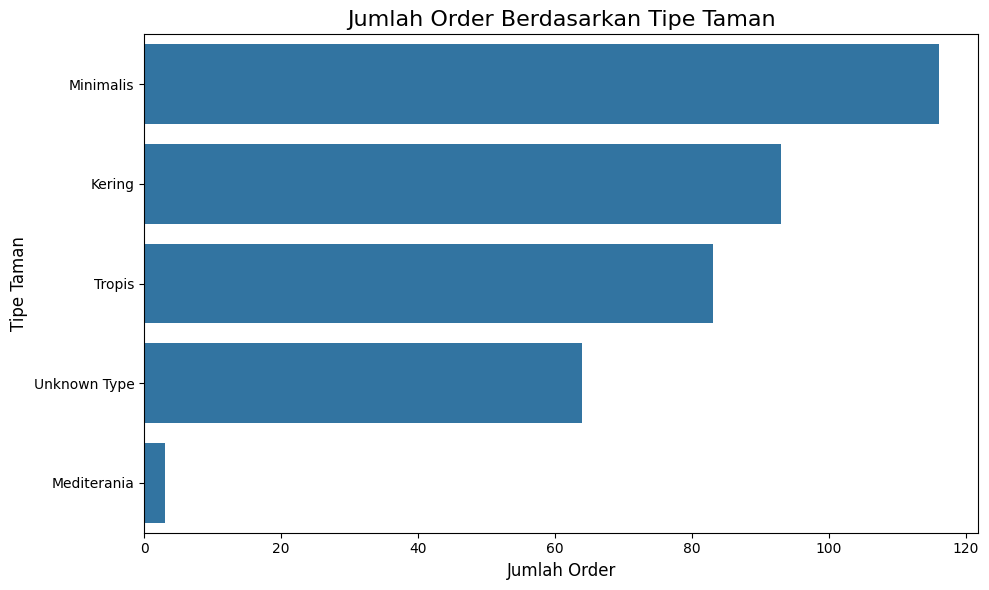

In [108]:

plt.figure(figsize=(10, 6))
sns.barplot(x='jumlah_order', y='category_name', data=tipe_taman_yang_populer)
plt.title('Jumlah Order Berdasarkan Tipe Taman', fontsize=16)
plt.xlabel('Jumlah Order', fontsize=12)
plt.ylabel('Tipe Taman', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
tipe_taman_yang_populer = fetch_data(host, port, user, passwd, databs, query_tipe_taman_yang_populer)
tipe_taman_yang_populer

,category_name,jumlah_order
0,Minimalis,116
1,Kering,93
2,Tropis,83
3,Unknown Type,64
4,Mediterania,3


#### Persebaran Order Desain Berdasarkan Provinsi 

In [109]:
query_persebaran_order = """  
SELECT 
    id_order,
    province,
    city,
    district,
    order_status,
    price,
    CAST(latitude AS FLOAT) AS latitude,
    CAST(longitude AS FLOAT) AS longitude,
    created_at
FROM
    (SELECT
        order_design.id_order,
        order_design.id_user,
        category_size.id_category,
        order_design.id_design_finish,
        category_design.id_category_design,
        user.name AS user_name,
        user.status AS user_status,
        design.design_name,
        design.status AS design_status,
        CASE
        	WHEN category_size.id_category = 1 THEN '< 10m^2'
        	WHEN category_size.id_category = 2 THEN '11 - 20m^2'
        	WHEN category_size.id_category = 3 THEN '21 - 30m^2'
        	WHEN category_size.id_category = 4 THEN '31 - 40m^2'
        	WHEN category_size.id_category = 5 THEN '41 - 50m^2'
        	ELSE '> 50m^2'
        END AS category_size,
        category_design.name AS category_name,
        order_design.status AS order_status,
        order_design.price,
        promo_code.code,
        promo_code.valid_from,
        promo_code.valid_until,
        order_design.created_at,
        order_design.updated_at,
        CASE
            WHEN address_components.administrative_area_level_1 IN ('Daerah Khusus Ibukota Jakarta','Jakarta') THEN 'Daerah Khusus Ibukota Jakarta'
            WHEN address_components.administrative_area_level_1 = 'Banten' THEN 'Banten'
            WHEN address_components.administrative_area_level_1 IN ('Jawa Barat', 'West Java') THEN 'Jawa Barat'
            WHEN address_components.administrative_area_level_1 IN ('Jawa Timur', 'East Java') THEN 'Jawa Timur'
            WHEN address_components.administrative_area_level_1 = 'Bali' THEN 'Bali'
            WHEN address_components.administrative_area_level_1 = 'Sulawesi Selatan' THEN 'Sulawesi Selatan'
            WHEN address_components.administrative_area_level_1 IN ('Sumatera Utara', 'North Sumatra') THEN 'Sumatera Utara'
            WHEN address_components.administrative_area_level_1 IN ('Jawa Tengah', 'Central Java') THEN 'Jawa Tengah'
            WHEN address_components.administrative_area_level_1 = 'Daerah Istimewa Yogyakarta' THEN 'Daerah Istimewa Yogyakarta'
            WHEN address_components.administrative_area_level_1 = 'Jambi' THEN 'Jambi'
            WHEN address_components.administrative_area_level_1 = 'Lampung' THEN 'Lampung'
            WHEN address_components.administrative_area_level_1 = 'Aceh' THEN 'Aceh'
            WHEN address_components.administrative_area_level_1 IN ('Sumatera Barat', 'West Sumatra') THEN 'Sumatera Barat'
            WHEN address_components.administrative_area_level_1 = 'Federal District' THEN 'Federal District'
            WHEN address_components.administrative_area_level_1 = '' OR address_components.administrative_area_level_1 IS NULL THEN 'Unknown Location'
            ELSE address_components.administrative_area_level_1
        END AS province,
        CASE
            WHEN address_components.administrative_area_level_2 IN ('Badung', 'Badung Regency') THEN 'Badung'
            WHEN address_components.administrative_area_level_2 IN ('Bandung', 'Bandung Regency') THEN 'Bandung'
            WHEN address_components.administrative_area_level_2 IN ('Banyumas', 'Banyumas Regency') THEN 'Banyumas'
            WHEN address_components.administrative_area_level_2 IN ('Bekasi', 'Bekasi Regency') THEN 'Bekasi'
            WHEN address_components.administrative_area_level_2 IN ('Bogor', 'Bogor Regency') THEN 'Bogor'
            WHEN address_components.administrative_area_level_2 IN ('Central Jakarta City', 'Jakarta Pusat') THEN 'Jakarta Pusat'
            WHEN address_components.administrative_area_level_2 IN ('Ciamis', 'Ciamis Regency') THEN 'Ciamis'
            WHEN address_components.administrative_area_level_2 IN ('Cimahi', 'Cimahi City') THEN 'Cimahi'
	        WHEN address_components.administrative_area_level_2 IN ('Deli Serdang', 'Deli Serdang Regency') THEN 'Deli Serdang'
            WHEN address_components.administrative_area_level_2 IN ('Depok', 'Depok City') THEN 'Depok'
            WHEN address_components.administrative_area_level_2 IN ('East Jakarta City', 'Jakarta Timur') THEN 'Jakarta Timur'
            WHEN address_components.administrative_area_level_2 IN ('Jakarta Barat', 'West Jakarta City') THEN 'Jakarta Barat'
            WHEN address_components.administrative_area_level_2 IN ('Jakarta Selatan', 'South Jakarta City') THEN 'Jakarta Selatan'
            WHEN address_components.administrative_area_level_2 IN ('Jakarta Utara', 'North Jakarta City') THEN 'Jakarta Utara'
            WHEN address_components.administrative_area_level_2 IN ('Jember', 'Jember Regency') THEN 'Jember'
            WHEN address_components.administrative_area_level_2 IN ('Klungkung', 'Klungkung Regency') THEN 'Klungkung'
            WHEN address_components.administrative_area_level_2 IN ('Pringsewu', 'Pringsewu Regency') THEN 'Pringsewu'
            WHEN address_components.administrative_area_level_2 IN ('Sukabumi', 'Sukabumi City') THEN 'Sukabumi'
            WHEN address_components.administrative_area_level_2 IN ('Tangerang', 'Tangerang City', 'Tangerang Regency') THEN 'Tangerang'
            WHEN address_components.administrative_area_level_2 IN ('Tangerang Selatan', 'South Tangerang City') THEN 'Tangerang Selatan'
            WHEN address_components.administrative_area_level_2 IN ('West Bandung', 'West Bandung Regency') THEN 'Bandung Barat'
            ELSE address_components.administrative_area_level_2
        END AS city,
        CASE
            WHEN address_components.administrative_area_level_3 IN ('South Kuta') THEN 'Kuta Selatan'
            ELSE address_components.administrative_area_level_3
        END AS district,
        latitude,
        longitude
    FROM
       	order_design
    LEFT JOIN
       	user ON user.id_user = order_design.id_designer
    LEFT JOIN
       	category_size ON category_size.id_category = order_design.id_category
    LEFT JOIN
       	design ON design.id_design = order_design.id_design_finish
    LEFT JOIN
       	category_design ON category_design.id_category_design = design.id_type
    LEFT JOIN
       	address_components ON address_components.address_componentable_id = order_design.id_order
    LEFT JOIN 
        promo_code on promo_code.id_promo = order_design.id_promo
    WHERE 
    	order_design.id_user > 249
    AND 
    	order_design.status NOT IN ('expired','new')
    AND 
    	address_components.address_componentable_type LIKE '%OrderDesign%'
)as master_table;
"""

In [110]:
persebaran_order = fetch_data(host, port, user, passwd, databs, query_persebaran_order)
persebaran_order

,id_order,province,city,district,order_status,price,latitude,longitude,created_at
0,568,Banten,Tangerang Selatan,,in_review,388500.0,-6.28352,106.7110,2024-04-20 15:28:15
1,569,Daerah Khusus Ibukota Jakarta,Jakarta Timur,Cakung,in_review,277500.0,-6.19922,106.9270,2024-04-21 10:30:22
2,570,Daerah Khusus Ibukota Jakarta,Jakarta Timur,Ciracas,finish,444000.0,-6.32984,106.8760,2024-04-21 16:00:33
3,571,Banten,Tangerang Selatan,Pondok Aren,in_review,388500.0,-6.26076,106.6900,2024-04-22 10:25:36
4,572,Daerah Khusus Ibukota Jakarta,Jakarta Timur,Pasar Rebo,finish,0.0,-6.29776,106.8620,2024-04-22 11:41:42
...,...,...,...,...,...,...,...,...,...
194,914,Daerah Khusus Ibukota Jakarta,Jakarta Timur,Kramat jati,finish,0.0,-6.25960,106.8690,2024-09-21 09:44:30
195,915,Sumatera Utara,Deli Serdang,Tanjung Morawa,on_going,0.0,3.53093,98.7633,2024-09-21 16:23:20
196,916,Sumatera Utara,Deli Serdang,Tanjung Morawa,on_going,NaN,3.53093,98.7633,2024-09-21 16:23:20
197,917,Sumatera Utara,Deli Serdang,Tanjung Morawa,on_going,NaN,3.53093,98.7633,2024-09-21 16:23:20


### Operasional

#### Total Desain yang Dibuatkan Taman

In [115]:
query_desain_dibuatkan_taman = """  
SELECT 
    COUNT(id_design_finish) AS jumlah_desain
FROM(
	SELECT 
    order_design.id_order,
    order_design.id_user,
    category_size.id_category,
    order_design.id_design_finish,
    category_design.id_category_design,
    user.name AS user_name,
    user.status AS user_status,
    design.design_name,
    design.status AS design_status,
    CASE
    	WHEN category_size.id_category = 1 THEN '< 10m^2'
		WHEN category_size.id_category = 2 THEN '11 - 20m^2'
   		WHEN category_size.id_category = 3 THEN '21 - 30m^2'
   		WHEN category_size.id_category = 4 THEN '31 - 40m^2'
   		WHEN category_size.id_category = 5 THEN '41 - 50m^2'
   		ELSE '> 50m^2'
   	END AS category_size,
   	category_design.name AS category_name,
   	order_design.status AS order_status,
   	order_design.price,
   	promo_code.code AS promo_code,
   	promo_code.valid_from,
   	promo_code.valid_until,
   	order_design.created_at,
   	order_design.updated_at,
    CASE
    	WHEN address_components.administrative_area_level_1 IN ('Daerah Khusus Ibukota Jakarta','Jakarta') THEN 'Daerah Khusus Ibukota Jakarta'
        WHEN address_components.administrative_area_level_1 = 'Banten' THEN 'Banten'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Barat', 'West Java') THEN 'Jawa Barat'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Timur', 'East Java') THEN 'Jawa Timur'
        WHEN address_components.administrative_area_level_1 = 'Bali' THEN 'Bali'
        WHEN address_components.administrative_area_level_1 = 'Sulawesi Selatan' THEN 'Sulawesi Selatan'
        WHEN address_components.administrative_area_level_1 IN ('Sumatera Utara', 'North Sumatra') THEN 'Sumatera Utara'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Tengah', 'Central Java') THEN 'Jawa Tengah'
        WHEN address_components.administrative_area_level_1 = 'Daerah Istimewa Yogyakarta' THEN 'Daerah Istimewa Yogyakarta'
        WHEN address_components.administrative_area_level_1 = 'Jambi' THEN 'Jambi'
        WHEN address_components.administrative_area_level_1 = 'Lampung' THEN 'Lampung'
        WHEN address_components.administrative_area_level_1 = 'Aceh' THEN 'Aceh'
        WHEN address_components.administrative_area_level_1 IN ('Sumatera Barat', 'West Sumatra') THEN 'Sumatera Barat'
        WHEN address_components.administrative_area_level_1 = 'Federal District' THEN 'Federal District'
        WHEN address_components.administrative_area_level_1 = '' OR address_components.administrative_area_level_1 IS NULL THEN 'Unknown Location'
        ELSE address_components.administrative_area_level_1
  	END AS province,
    CASE
        WHEN address_components.administrative_area_level_2 IN ('Badung', 'Badung Regency') THEN 'Badung'
        WHEN address_components.administrative_area_level_2 IN ('Bandung', 'Bandung Regency') THEN 'Bandung'
        WHEN address_components.administrative_area_level_2 IN ('Banyumas', 'Banyumas Regency') THEN 'Banyumas'
        WHEN address_components.administrative_area_level_2 IN ('Bekasi', 'Bekasi Regency') THEN 'Bekasi'
        WHEN address_components.administrative_area_level_2 IN ('Bogor', 'Bogor Regency') THEN 'Bogor'
        WHEN address_components.administrative_area_level_2 IN ('Central Jakarta City', 'Jakarta Pusat') THEN 'Jakarta Pusat'
        WHEN address_components.administrative_area_level_2 IN ('Ciamis', 'Ciamis Regency') THEN 'Ciamis'
        WHEN address_components.administrative_area_level_2 IN ('Cimahi', 'Cimahi City') THEN 'Cimahi'
        WHEN address_components.administrative_area_level_2 IN ('Deli Serdang', 'Deli Serdang Regency') THEN 'Deli Serdang'
        WHEN address_components.administrative_area_level_2 IN ('Depok', 'Depok City') THEN 'Depok'
        WHEN address_components.administrative_area_level_2 IN ('East Jakarta City', 'Jakarta Timur') THEN 'Jakarta Timur'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Barat', 'West Jakarta City') THEN 'Jakarta Barat'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Selatan', 'South Jakarta City') THEN 'Jakarta Selatan'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Utara', 'North Jakarta City') THEN 'Jakarta Utara'
        WHEN address_components.administrative_area_level_2 IN ('Jember', 'Jember Regency') THEN 'Jember'
        WHEN address_components.administrative_area_level_2 IN ('Klungkung', 'Klungkung Regency') THEN 'Klungkung'
        WHEN address_components.administrative_area_level_2 IN ('Pringsewu', 'Pringsewu Regency') THEN 'Pringsewu'
        WHEN address_components.administrative_area_level_2 IN ('Sukabumi', 'Sukabumi City') THEN 'Sukabumi'
        WHEN address_components.administrative_area_level_2 IN ('Tangerang', 'Tangerang City', 'Tangerang Regency') THEN 'Tangerang'
        WHEN address_components.administrative_area_level_2 IN ('Tangerang Selatan', 'South Tangerang City') THEN 'Tangerang Selatan'
        WHEN address_components.administrative_area_level_2 IN ('West Bandung', 'West Bandung Regency') THEN 'Bandung Barat'
        WHEN address_components.administrative_area_level_2 = ' ' THEN 'Unknown City'
        ELSE address_components.administrative_area_level_2
    END AS city,
    CASE
        WHEN address_components.administrative_area_level_3 IN ('South Kuta') THEN 'Kuta Selatan'
        WHEN address_components.administrative_area_level_3 = ' ' THEN 'Unknown District'
        ELSE address_components.administrative_area_level_3
    END AS district
    FROM
    	order_design
    JOIN 
        order_garden ON order_garden.id_design_finish = order_design.id_design_finish
    LEFT JOIN
    	user ON user.id_user = order_design.id_designer
    LEFT JOIN
    	category_size ON category_size.id_category = order_design.id_category
    LEFT JOIN
    	design ON design.id_design = order_design.id_design_finish
    LEFT JOIN
    	category_design ON category_design.id_category_design = design.id_type
    LEFT JOIN
    	address_components ON address_components.address_componentable_id = order_design.id_order
    LEFT JOIN 
        promo_code ON promo_code.id_promo = order_design.id_promo
    WHERE 
    	order_design.id_user > 249
    AND
    	order_design.status NOT IN ('expired','new')
) AS master_table
"""

In [116]:
desain_dibuatkan_taman = fetch_data(host, port, user, passwd, databs, query_desain_dibuatkan_taman)
desain_dibuatkan_taman

,jumlah_desain
0,114


#### Total Desain Berdasarkan Kategori Ukuran

In [117]:
query_total_desain_berdasarkan_ukuran = """
SELECT 
    category_size,
    COUNT(design_name) AS jumlah_desain
FROM(
	SELECT 
    order_design.id_order,
    order_design.id_user,
    category_size.id_category,
    order_design.id_design_finish,
    category_design.id_category_design,
    user.name AS user_name,
    user.status AS user_status,
    design.design_name,
    design.status AS design_status,
    CASE
    	WHEN category_size.id_category = 1 THEN '< 10m^2'
		WHEN category_size.id_category = 2 THEN '11 - 20m^2'
   		WHEN category_size.id_category = 3 THEN '21 - 30m^2'
   		WHEN category_size.id_category = 4 THEN '31 - 40m^2'
   		WHEN category_size.id_category = 5 THEN '41 - 50m^2'
   		ELSE '> 50m^2'
   	END AS category_size,
   	category_design.name AS category_name,
   	order_design.status AS order_status,
   	order_design.price,
   	promo_code.code AS promo_code,
   	promo_code.valid_from,
   	promo_code.valid_until,
   	order_design.created_at,
   	order_design.updated_at,
    CASE
    	WHEN address_components.administrative_area_level_1 IN ('Daerah Khusus Ibukota Jakarta','Jakarta') THEN 'Daerah Khusus Ibukota Jakarta'
        WHEN address_components.administrative_area_level_1 = 'Banten' THEN 'Banten'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Barat', 'West Java') THEN 'Jawa Barat'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Timur', 'East Java') THEN 'Jawa Timur'
        WHEN address_components.administrative_area_level_1 = 'Bali' THEN 'Bali'
        WHEN address_components.administrative_area_level_1 = 'Sulawesi Selatan' THEN 'Sulawesi Selatan'
        WHEN address_components.administrative_area_level_1 IN ('Sumatera Utara', 'North Sumatra') THEN 'Sumatera Utara'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Tengah', 'Central Java') THEN 'Jawa Tengah'
        WHEN address_components.administrative_area_level_1 = 'Daerah Istimewa Yogyakarta' THEN 'Daerah Istimewa Yogyakarta'
        WHEN address_components.administrative_area_level_1 = 'Jambi' THEN 'Jambi'
        WHEN address_components.administrative_area_level_1 = 'Lampung' THEN 'Lampung'
        WHEN address_components.administrative_area_level_1 = 'Aceh' THEN 'Aceh'
        WHEN address_components.administrative_area_level_1 IN ('Sumatera Barat', 'West Sumatra') THEN 'Sumatera Barat'
        WHEN address_components.administrative_area_level_1 = 'Federal District' THEN 'Federal District'
        WHEN address_components.administrative_area_level_1 = '' OR address_components.administrative_area_level_1 IS NULL THEN 'Unknown Location'
        ELSE address_components.administrative_area_level_1
  	END AS province,
    CASE
        WHEN address_components.administrative_area_level_2 IN ('Badung', 'Badung Regency') THEN 'Badung'
        WHEN address_components.administrative_area_level_2 IN ('Bandung', 'Bandung Regency') THEN 'Bandung'
        WHEN address_components.administrative_area_level_2 IN ('Banyumas', 'Banyumas Regency') THEN 'Banyumas'
        WHEN address_components.administrative_area_level_2 IN ('Bekasi', 'Bekasi Regency') THEN 'Bekasi'
        WHEN address_components.administrative_area_level_2 IN ('Bogor', 'Bogor Regency') THEN 'Bogor'
        WHEN address_components.administrative_area_level_2 IN ('Central Jakarta City', 'Jakarta Pusat') THEN 'Jakarta Pusat'
        WHEN address_components.administrative_area_level_2 IN ('Ciamis', 'Ciamis Regency') THEN 'Ciamis'
        WHEN address_components.administrative_area_level_2 IN ('Cimahi', 'Cimahi City') THEN 'Cimahi'
        WHEN address_components.administrative_area_level_2 IN ('Deli Serdang', 'Deli Serdang Regency') THEN 'Deli Serdang'
        WHEN address_components.administrative_area_level_2 IN ('Depok', 'Depok City') THEN 'Depok'
        WHEN address_components.administrative_area_level_2 IN ('East Jakarta City', 'Jakarta Timur') THEN 'Jakarta Timur'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Barat', 'West Jakarta City') THEN 'Jakarta Barat'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Selatan', 'South Jakarta City') THEN 'Jakarta Selatan'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Utara', 'North Jakarta City') THEN 'Jakarta Utara'
        WHEN address_components.administrative_area_level_2 IN ('Jember', 'Jember Regency') THEN 'Jember'
        WHEN address_components.administrative_area_level_2 IN ('Klungkung', 'Klungkung Regency') THEN 'Klungkung'
        WHEN address_components.administrative_area_level_2 IN ('Pringsewu', 'Pringsewu Regency') THEN 'Pringsewu'
        WHEN address_components.administrative_area_level_2 IN ('Sukabumi', 'Sukabumi City') THEN 'Sukabumi'
        WHEN address_components.administrative_area_level_2 IN ('Tangerang', 'Tangerang City', 'Tangerang Regency') THEN 'Tangerang'
        WHEN address_components.administrative_area_level_2 IN ('Tangerang Selatan', 'South Tangerang City') THEN 'Tangerang Selatan'
        WHEN address_components.administrative_area_level_2 IN ('West Bandung', 'West Bandung Regency') THEN 'Bandung Barat'
        WHEN address_components.administrative_area_level_2 = ' ' THEN 'Unknown City'
        ELSE address_components.administrative_area_level_2
    END AS city,
    CASE
        WHEN address_components.administrative_area_level_3 IN ('South Kuta') THEN 'Kuta Selatan'
        WHEN address_components.administrative_area_level_3 = ' ' THEN 'Unknown District'
        ELSE address_components.administrative_area_level_3
    END AS district
    FROM
    	order_design
    LEFT JOIN
    	user ON user.id_user = order_design.id_designer
    LEFT JOIN
    	category_size ON category_size.id_category = order_design.id_category
    LEFT JOIN
    	design ON design.id_design = order_design.id_design_finish
    LEFT JOIN
    	category_design ON category_design.id_category_design = design.id_type
    LEFT JOIN
    	address_components ON address_components.address_componentable_id = order_design.id_order
    LEFT JOIN 
        promo_code ON promo_code.id_promo = order_design.id_promo
    WHERE 
    	order_design.id_user > 249
    AND
    	order_design.status NOT IN ('expired','new')
) AS master_table
GROUP BY 
    category_size
ORDER BY 
    jumlah_desain DESC;
"""

In [118]:
total_desain_berdasarkan_ukuran = fetch_data(host, port, user, passwd, databs, query_total_desain_berdasarkan_ukuran)
total_desain_berdasarkan_ukuran

,category_size,jumlah_desain
0,< 10m^2,138
1,11 - 20m^2,79
2,> 50m^2,32
3,21 - 30m^2,25
4,31 - 40m^2,12
5,41 - 50m^2,11


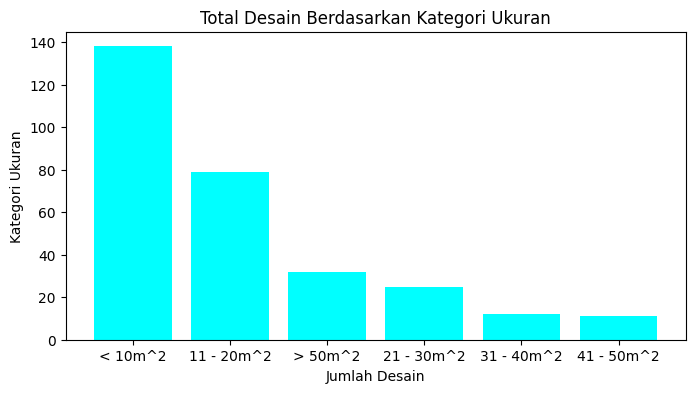

In [119]:
plt.figure(figsize=(8, 4))
plt.bar(total_desain_berdasarkan_ukuran['category_size'],total_desain_berdasarkan_ukuran['jumlah_desain'], color='cyan')

# Menambahkan judul dan label
plt.title("Total Desain Berdasarkan Kategori Ukuran")
plt.xlabel("Jumlah Desain")
plt.ylabel("Kategori Ukuran")

# Menampilkan plot
plt.show()

Berdasarkan grafik tersebut, jumlah order tertinggi berasal dari kategori ukuran `< 10m^2` yaitu sebanyak 138 jumlah order. Sedangkan jumlah order terendah berasal dari kategori ukuran `41 - 50m^2` yaitu sebanyak 15 jumlah order.

#### Total Order yang Dibatalkan

In [120]:
query_order_dibatalkan = """  
SELECT
    COUNT(order_status) AS jumlah_dibatalkan
FROM(
	SELECT 
    order_design.id_order,
    order_design.id_user,
    category_size.id_category,
    order_design.id_design_finish,
    category_design.id_category_design,
    user.name AS user_name,
    user.status AS user_status,
    design.design_name,
    design.status AS design_status,
    CASE
    	WHEN category_size.id_category = 1 THEN '< 10m^2'
		WHEN category_size.id_category = 2 THEN '11 - 20m^2'
   		WHEN category_size.id_category = 3 THEN '21 - 30m^2'
   		WHEN category_size.id_category = 4 THEN '31 - 40m^2'
   		WHEN category_size.id_category = 5 THEN '41 - 50m^2'
   		ELSE '> 50m^2'
   	END AS category_size,
   	category_design.name AS category_name,
   	order_design.status AS order_status,
   	order_design.price,
   	promo_code.code AS promo_code,
   	promo_code.valid_from,
   	promo_code.valid_until,
   	order_design.created_at,
   	order_design.updated_at,
    CASE
    	WHEN address_components.administrative_area_level_1 IN ('Daerah Khusus Ibukota Jakarta','Jakarta') THEN 'Daerah Khusus Ibukota Jakarta'
        WHEN address_components.administrative_area_level_1 = 'Banten' THEN 'Banten'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Barat', 'West Java') THEN 'Jawa Barat'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Timur', 'East Java') THEN 'Jawa Timur'
        WHEN address_components.administrative_area_level_1 = 'Bali' THEN 'Bali'
        WHEN address_components.administrative_area_level_1 = 'Sulawesi Selatan' THEN 'Sulawesi Selatan'
        WHEN address_components.administrative_area_level_1 IN ('Sumatera Utara', 'North Sumatra') THEN 'Sumatera Utara'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Tengah', 'Central Java') THEN 'Jawa Tengah'
        WHEN address_components.administrative_area_level_1 = 'Daerah Istimewa Yogyakarta' THEN 'Daerah Istimewa Yogyakarta'
        WHEN address_components.administrative_area_level_1 = 'Jambi' THEN 'Jambi'
        WHEN address_components.administrative_area_level_1 = 'Lampung' THEN 'Lampung'
        WHEN address_components.administrative_area_level_1 = 'Aceh' THEN 'Aceh'
        WHEN address_components.administrative_area_level_1 IN ('Sumatera Barat', 'West Sumatra') THEN 'Sumatera Barat'
        WHEN address_components.administrative_area_level_1 = 'Federal District' THEN 'Federal District'
        WHEN address_components.administrative_area_level_1 = '' OR address_components.administrative_area_level_1 IS NULL THEN 'Unknown Location'
        ELSE address_components.administrative_area_level_1
  	END AS province,
    CASE
        WHEN address_components.administrative_area_level_2 IN ('Badung', 'Badung Regency') THEN 'Badung'
        WHEN address_components.administrative_area_level_2 IN ('Bandung', 'Bandung Regency') THEN 'Bandung'
        WHEN address_components.administrative_area_level_2 IN ('Banyumas', 'Banyumas Regency') THEN 'Banyumas'
        WHEN address_components.administrative_area_level_2 IN ('Bekasi', 'Bekasi Regency') THEN 'Bekasi'
        WHEN address_components.administrative_area_level_2 IN ('Bogor', 'Bogor Regency') THEN 'Bogor'
        WHEN address_components.administrative_area_level_2 IN ('Central Jakarta City', 'Jakarta Pusat') THEN 'Jakarta Pusat'
        WHEN address_components.administrative_area_level_2 IN ('Ciamis', 'Ciamis Regency') THEN 'Ciamis'
        WHEN address_components.administrative_area_level_2 IN ('Cimahi', 'Cimahi City') THEN 'Cimahi'
        WHEN address_components.administrative_area_level_2 IN ('Deli Serdang', 'Deli Serdang Regency') THEN 'Deli Serdang'
        WHEN address_components.administrative_area_level_2 IN ('Depok', 'Depok City') THEN 'Depok'
        WHEN address_components.administrative_area_level_2 IN ('East Jakarta City', 'Jakarta Timur') THEN 'Jakarta Timur'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Barat', 'West Jakarta City') THEN 'Jakarta Barat'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Selatan', 'South Jakarta City') THEN 'Jakarta Selatan'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Utara', 'North Jakarta City') THEN 'Jakarta Utara'
        WHEN address_components.administrative_area_level_2 IN ('Jember', 'Jember Regency') THEN 'Jember'
        WHEN address_components.administrative_area_level_2 IN ('Klungkung', 'Klungkung Regency') THEN 'Klungkung'
        WHEN address_components.administrative_area_level_2 IN ('Pringsewu', 'Pringsewu Regency') THEN 'Pringsewu'
        WHEN address_components.administrative_area_level_2 IN ('Sukabumi', 'Sukabumi City') THEN 'Sukabumi'
        WHEN address_components.administrative_area_level_2 IN ('Tangerang', 'Tangerang City', 'Tangerang Regency') THEN 'Tangerang'
        WHEN address_components.administrative_area_level_2 IN ('Tangerang Selatan', 'South Tangerang City') THEN 'Tangerang Selatan'
        WHEN address_components.administrative_area_level_2 IN ('West Bandung', 'West Bandung Regency') THEN 'Bandung Barat'
        WHEN address_components.administrative_area_level_2 = ' ' THEN 'Unknown City'
        ELSE address_components.administrative_area_level_2
    END AS city,
    CASE
        WHEN address_components.administrative_area_level_3 IN ('South Kuta') THEN 'Kuta Selatan'
        WHEN address_components.administrative_area_level_3 = ' ' THEN 'Unknown District'
        ELSE address_components.administrative_area_level_3
    END AS district
    FROM
    	order_design
    LEFT JOIN
    	user ON user.id_user = order_design.id_designer
    LEFT JOIN
    	category_size ON category_size.id_category = order_design.id_category
    LEFT JOIN
    	design ON design.id_design = order_design.id_design_finish
    LEFT JOIN
    	category_design ON category_design.id_category_design = design.id_type
    LEFT JOIN
    	address_components ON address_components.address_componentable_id = order_design.id_order
    LEFT JOIN 
        promo_code ON promo_code.id_promo = order_design.id_promo
    WHERE 
    	order_design.id_user > 249
    AND
    	order_design.status = 'expired'
) AS master_table;
"""

In [121]:
total_order_dibatalkan = fetch_data(host, port, user, passwd, databs, query_order_dibatalkan)
total_order_dibatalkan

,jumlah_dibatalkan
0,48


#### Total Desain yang Masuk

In [124]:
query_jumlah_desain_masuk = """  
SELECT 
    COUNT(design_name) AS jumlah_desain
FROM(
	SELECT 
    order_design.id_order,
    order_design.id_user,
    category_size.id_category,
    order_design.id_design_finish,
    category_design.id_category_design,
    user.name AS user_name,
    user.status AS user_status,
    design.design_name,
    design.status AS design_status,
    CASE
    	WHEN category_size.id_category = 1 THEN '< 10m^2'
		WHEN category_size.id_category = 2 THEN '11 - 20m^2'
   		WHEN category_size.id_category = 3 THEN '21 - 30m^2'
   		WHEN category_size.id_category = 4 THEN '31 - 40m^2'
   		WHEN category_size.id_category = 5 THEN '41 - 50m^2'
   		ELSE '> 50m^2'
   	END AS category_size,
   	category_design.name AS category_name,
   	order_design.status AS order_status,
   	order_design.price,
   	promo_code.code AS promo_code,
   	promo_code.valid_from,
   	promo_code.valid_until,
   	order_design.created_at,
   	order_design.updated_at,
    CASE
    	WHEN address_components.administrative_area_level_1 IN ('Daerah Khusus Ibukota Jakarta','Jakarta') THEN 'Daerah Khusus Ibukota Jakarta'
        WHEN address_components.administrative_area_level_1 = 'Banten' THEN 'Banten'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Barat', 'West Java') THEN 'Jawa Barat'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Timur', 'East Java') THEN 'Jawa Timur'
        WHEN address_components.administrative_area_level_1 = 'Bali' THEN 'Bali'
        WHEN address_components.administrative_area_level_1 = 'Sulawesi Selatan' THEN 'Sulawesi Selatan'
        WHEN address_components.administrative_area_level_1 IN ('Sumatera Utara', 'North Sumatra') THEN 'Sumatera Utara'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Tengah', 'Central Java') THEN 'Jawa Tengah'
        WHEN address_components.administrative_area_level_1 = 'Daerah Istimewa Yogyakarta' THEN 'Daerah Istimewa Yogyakarta'
        WHEN address_components.administrative_area_level_1 = 'Jambi' THEN 'Jambi'
        WHEN address_components.administrative_area_level_1 = 'Lampung' THEN 'Lampung'
        WHEN address_components.administrative_area_level_1 = 'Aceh' THEN 'Aceh'
        WHEN address_components.administrative_area_level_1 IN ('Sumatera Barat', 'West Sumatra') THEN 'Sumatera Barat'
        WHEN address_components.administrative_area_level_1 = 'Federal District' THEN 'Federal District'
        WHEN address_components.administrative_area_level_1 = '' OR address_components.administrative_area_level_1 IS NULL THEN 'Unknown Location'
        ELSE address_components.administrative_area_level_1
  	END AS province,
    CASE
        WHEN address_components.administrative_area_level_2 IN ('Badung', 'Badung Regency') THEN 'Badung'
        WHEN address_components.administrative_area_level_2 IN ('Bandung', 'Bandung Regency') THEN 'Bandung'
        WHEN address_components.administrative_area_level_2 IN ('Banyumas', 'Banyumas Regency') THEN 'Banyumas'
        WHEN address_components.administrative_area_level_2 IN ('Bekasi', 'Bekasi Regency') THEN 'Bekasi'
        WHEN address_components.administrative_area_level_2 IN ('Bogor', 'Bogor Regency') THEN 'Bogor'
        WHEN address_components.administrative_area_level_2 IN ('Central Jakarta City', 'Jakarta Pusat') THEN 'Jakarta Pusat'
        WHEN address_components.administrative_area_level_2 IN ('Ciamis', 'Ciamis Regency') THEN 'Ciamis'
        WHEN address_components.administrative_area_level_2 IN ('Cimahi', 'Cimahi City') THEN 'Cimahi'
        WHEN address_components.administrative_area_level_2 IN ('Deli Serdang', 'Deli Serdang Regency') THEN 'Deli Serdang'
        WHEN address_components.administrative_area_level_2 IN ('Depok', 'Depok City') THEN 'Depok'
        WHEN address_components.administrative_area_level_2 IN ('East Jakarta City', 'Jakarta Timur') THEN 'Jakarta Timur'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Barat', 'West Jakarta City') THEN 'Jakarta Barat'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Selatan', 'South Jakarta City') THEN 'Jakarta Selatan'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Utara', 'North Jakarta City') THEN 'Jakarta Utara'
        WHEN address_components.administrative_area_level_2 IN ('Jember', 'Jember Regency') THEN 'Jember'
        WHEN address_components.administrative_area_level_2 IN ('Klungkung', 'Klungkung Regency') THEN 'Klungkung'
        WHEN address_components.administrative_area_level_2 IN ('Pringsewu', 'Pringsewu Regency') THEN 'Pringsewu'
        WHEN address_components.administrative_area_level_2 IN ('Sukabumi', 'Sukabumi City') THEN 'Sukabumi'
        WHEN address_components.administrative_area_level_2 IN ('Tangerang', 'Tangerang City', 'Tangerang Regency') THEN 'Tangerang'
        WHEN address_components.administrative_area_level_2 IN ('Tangerang Selatan', 'South Tangerang City') THEN 'Tangerang Selatan'
        WHEN address_components.administrative_area_level_2 IN ('West Bandung', 'West Bandung Regency') THEN 'Bandung Barat'
        WHEN address_components.administrative_area_level_2 = ' ' THEN 'Unknown City'
        ELSE address_components.administrative_area_level_2
    END AS city,
    CASE
        WHEN address_components.administrative_area_level_3 IN ('South Kuta') THEN 'Kuta Selatan'
        WHEN address_components.administrative_area_level_3 = ' ' THEN 'Unknown District'
        ELSE address_components.administrative_area_level_3
    END AS district
    FROM
    	order_design
    LEFT JOIN
    	user ON user.id_user = order_design.id_designer
    LEFT JOIN
    	category_size ON category_size.id_category = order_design.id_category
    JOIN
    	design ON design.id_design = order_design.id_design_finish
    LEFT JOIN
    	category_design ON category_design.id_category_design = design.id_type
    LEFT JOIN
    	address_components ON address_components.address_componentable_id = order_design.id_order
    LEFT JOIN 
        promo_code ON promo_code.id_promo = order_design.id_promo
    WHERE 
    	order_design.id_user > 249
    AND
    	order_design.status NOT IN ('expired','new')
) AS master_table;
"""

In [125]:
total_design_masuk = fetch_data(host, port, user, passwd, databs, query_jumlah_desain_masuk)
total_design_masuk

,jumlah_desain
0,297


#### Waktu Rata-rata Untuk Menyelesaikan 1 Proyek

In [126]:
query_waktu_1_proyek = """
SELECT
ROUND(AVG(DATEDIFF(updated_at, created_at)),0) AS rata2_waktu_dalam_hari
FROM (
	SELECT 
    order_design.id_order,
    order_design.id_user,
    category_size.id_category,
    order_design.id_design_finish,
    category_design.id_category_design,
    user.name AS user_name,
    user.status AS user_status,
    design.design_name,
    design.status AS design_status,
    CASE
    	WHEN category_size.id_category = 1 THEN '< 10m^2'
		WHEN category_size.id_category = 2 THEN '11 - 20m^2'
   		WHEN category_size.id_category = 3 THEN '21 - 30m^2'
   		WHEN category_size.id_category = 4 THEN '31 - 40m^2'
   		WHEN category_size.id_category = 5 THEN '41 - 50m^2'
   		ELSE '> 50m^2'
   	END AS category_size,
   	category_design.name AS category_name,
   	order_design.status AS order_status,
   	order_design.price,
   	promo_code.code AS promo_code,
   	promo_code.valid_from,
   	promo_code.valid_until,
   	order_design.created_at,
   	order_design.updated_at,
    CASE
    	WHEN address_components.administrative_area_level_1 IN ('Daerah Khusus Ibukota Jakarta','Jakarta') THEN 'Daerah Khusus Ibukota Jakarta'
        WHEN address_components.administrative_area_level_1 = 'Banten' THEN 'Banten'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Barat', 'West Java') THEN 'Jawa Barat'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Timur', 'East Java') THEN 'Jawa Timur'
        WHEN address_components.administrative_area_level_1 = 'Bali' THEN 'Bali'
        WHEN address_components.administrative_area_level_1 = 'Sulawesi Selatan' THEN 'Sulawesi Selatan'
        WHEN address_components.administrative_area_level_1 IN ('Sumatera Utara', 'North Sumatra') THEN 'Sumatera Utara'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Tengah', 'Central Java') THEN 'Jawa Tengah'
        WHEN address_components.administrative_area_level_1 = 'Daerah Istimewa Yogyakarta' THEN 'Daerah Istimewa Yogyakarta'
        WHEN address_components.administrative_area_level_1 = 'Jambi' THEN 'Jambi'
        WHEN address_components.administrative_area_level_1 = 'Lampung' THEN 'Lampung'
        WHEN address_components.administrative_area_level_1 = 'Aceh' THEN 'Aceh'
        WHEN address_components.administrative_area_level_1 IN ('Sumatera Barat', 'West Sumatra') THEN 'Sumatera Barat'
        WHEN address_components.administrative_area_level_1 = 'Federal District' THEN 'Federal District'
        WHEN address_components.administrative_area_level_1 = '' OR address_components.administrative_area_level_1 IS NULL THEN 'Unknown Location'
        ELSE address_components.administrative_area_level_1
  	END AS province,
    CASE
        WHEN address_components.administrative_area_level_2 IN ('Badung', 'Badung Regency') THEN 'Badung'
        WHEN address_components.administrative_area_level_2 IN ('Bandung', 'Bandung Regency') THEN 'Bandung'
        WHEN address_components.administrative_area_level_2 IN ('Banyumas', 'Banyumas Regency') THEN 'Banyumas'
        WHEN address_components.administrative_area_level_2 IN ('Bekasi', 'Bekasi Regency') THEN 'Bekasi'
        WHEN address_components.administrative_area_level_2 IN ('Bogor', 'Bogor Regency') THEN 'Bogor'
        WHEN address_components.administrative_area_level_2 IN ('Central Jakarta City', 'Jakarta Pusat') THEN 'Jakarta Pusat'
        WHEN address_components.administrative_area_level_2 IN ('Ciamis', 'Ciamis Regency') THEN 'Ciamis'
        WHEN address_components.administrative_area_level_2 IN ('Cimahi', 'Cimahi City') THEN 'Cimahi'
        WHEN address_components.administrative_area_level_2 IN ('Deli Serdang', 'Deli Serdang Regency') THEN 'Deli Serdang'
        WHEN address_components.administrative_area_level_2 IN ('Depok', 'Depok City') THEN 'Depok'
        WHEN address_components.administrative_area_level_2 IN ('East Jakarta City', 'Jakarta Timur') THEN 'Jakarta Timur'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Barat', 'West Jakarta City') THEN 'Jakarta Barat'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Selatan', 'South Jakarta City') THEN 'Jakarta Selatan'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Utara', 'North Jakarta City') THEN 'Jakarta Utara'
        WHEN address_components.administrative_area_level_2 IN ('Jember', 'Jember Regency') THEN 'Jember'
        WHEN address_components.administrative_area_level_2 IN ('Klungkung', 'Klungkung Regency') THEN 'Klungkung'
        WHEN address_components.administrative_area_level_2 IN ('Pringsewu', 'Pringsewu Regency') THEN 'Pringsewu'
        WHEN address_components.administrative_area_level_2 IN ('Sukabumi', 'Sukabumi City') THEN 'Sukabumi'
        WHEN address_components.administrative_area_level_2 IN ('Tangerang', 'Tangerang City', 'Tangerang Regency') THEN 'Tangerang'
        WHEN address_components.administrative_area_level_2 IN ('Tangerang Selatan', 'South Tangerang City') THEN 'Tangerang Selatan'
        WHEN address_components.administrative_area_level_2 IN ('West Bandung', 'West Bandung Regency') THEN 'Bandung Barat'
        WHEN address_components.administrative_area_level_2 = ' ' THEN 'Unknown City'
        ELSE address_components.administrative_area_level_2
    END AS city,
    CASE
        WHEN address_components.administrative_area_level_3 IN ('South Kuta') THEN 'Kuta Selatan'
        WHEN address_components.administrative_area_level_3 = ' ' THEN 'Unknown District'
        ELSE address_components.administrative_area_level_3
    END AS district
    FROM
    	order_design
    LEFT JOIN
    	user ON user.id_user = order_design.id_designer
    LEFT JOIN
    	category_size ON category_size.id_category = order_design.id_category
    LEFT JOIN
    	design ON design.id_design = order_design.id_design_finish
    LEFT JOIN
    	category_design ON category_design.id_category_design = design.id_type
    LEFT JOIN
    	address_components ON address_components.address_componentable_id = order_design.id_order
    LEFT JOIN 
        promo_code ON promo_code.id_promo = order_design.id_promo
    WHERE 
    	order_design.id_user > 249
    AND
    	order_design.status = 'finish'
) AS master_table;
"""

In [127]:
waktu_1_proyek = fetch_data(host, port, user, passwd, databs, query_waktu_1_proyek)
waktu_1_proyek 

,rata2_waktu_dalam_hari
0,29.0


#### Jumlah Proyek yang Dihandle oleh Desainer 

In [130]:
query_proyek = """  
SELECT 
    user_name,
    COUNT(id_design_finish) AS jumlah_proyek
FROM(
	SELECT 
    order_design.id_order,
    order_design.id_user,
    category_size.id_category,
    order_design.id_design_finish,
    category_design.id_category_design,
    user.name AS user_name,
    user.status AS user_status,
    design.design_name,
    design.status AS design_status,
    CASE
    	WHEN category_size.id_category = 1 THEN '< 10m^2'
		WHEN category_size.id_category = 2 THEN '11 - 20m^2'
   		WHEN category_size.id_category = 3 THEN '21 - 30m^2'
   		WHEN category_size.id_category = 4 THEN '31 - 40m^2'
   		WHEN category_size.id_category = 5 THEN '41 - 50m^2'
   		ELSE '> 50m^2'
   	END AS category_size,
   	category_design.name AS category_name,
   	order_design.status AS order_status,
   	order_design.price,
   	promo_code.code AS promo_code,
   	promo_code.valid_from,
   	promo_code.valid_until,
   	order_design.created_at,
   	order_design.updated_at,
    CASE
    	WHEN address_components.administrative_area_level_1 IN ('Daerah Khusus Ibukota Jakarta','Jakarta') THEN 'Daerah Khusus Ibukota Jakarta'
        WHEN address_components.administrative_area_level_1 = 'Banten' THEN 'Banten'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Barat', 'West Java') THEN 'Jawa Barat'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Timur', 'East Java') THEN 'Jawa Timur'
        WHEN address_components.administrative_area_level_1 = 'Bali' THEN 'Bali'
        WHEN address_components.administrative_area_level_1 = 'Sulawesi Selatan' THEN 'Sulawesi Selatan'
        WHEN address_components.administrative_area_level_1 IN ('Sumatera Utara', 'North Sumatra') THEN 'Sumatera Utara'
        WHEN address_components.administrative_area_level_1 IN ('Jawa Tengah', 'Central Java') THEN 'Jawa Tengah'
        WHEN address_components.administrative_area_level_1 = 'Daerah Istimewa Yogyakarta' THEN 'Daerah Istimewa Yogyakarta'
        WHEN address_components.administrative_area_level_1 = 'Jambi' THEN 'Jambi'
        WHEN address_components.administrative_area_level_1 = 'Lampung' THEN 'Lampung'
        WHEN address_components.administrative_area_level_1 = 'Aceh' THEN 'Aceh'
        WHEN address_components.administrative_area_level_1 IN ('Sumatera Barat', 'West Sumatra') THEN 'Sumatera Barat'
        WHEN address_components.administrative_area_level_1 = 'Federal District' THEN 'Federal District'
        WHEN address_components.administrative_area_level_1 = '' OR address_components.administrative_area_level_1 IS NULL THEN 'Unknown Location'
        ELSE address_components.administrative_area_level_1
  	END AS province,
    CASE
        WHEN address_components.administrative_area_level_2 IN ('Badung', 'Badung Regency') THEN 'Badung'
        WHEN address_components.administrative_area_level_2 IN ('Bandung', 'Bandung Regency') THEN 'Bandung'
        WHEN address_components.administrative_area_level_2 IN ('Banyumas', 'Banyumas Regency') THEN 'Banyumas'
        WHEN address_components.administrative_area_level_2 IN ('Bekasi', 'Bekasi Regency') THEN 'Bekasi'
        WHEN address_components.administrative_area_level_2 IN ('Bogor', 'Bogor Regency') THEN 'Bogor'
        WHEN address_components.administrative_area_level_2 IN ('Central Jakarta City', 'Jakarta Pusat') THEN 'Jakarta Pusat'
        WHEN address_components.administrative_area_level_2 IN ('Ciamis', 'Ciamis Regency') THEN 'Ciamis'
        WHEN address_components.administrative_area_level_2 IN ('Cimahi', 'Cimahi City') THEN 'Cimahi'
        WHEN address_components.administrative_area_level_2 IN ('Deli Serdang', 'Deli Serdang Regency') THEN 'Deli Serdang'
        WHEN address_components.administrative_area_level_2 IN ('Depok', 'Depok City') THEN 'Depok'
        WHEN address_components.administrative_area_level_2 IN ('East Jakarta City', 'Jakarta Timur') THEN 'Jakarta Timur'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Barat', 'West Jakarta City') THEN 'Jakarta Barat'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Selatan', 'South Jakarta City') THEN 'Jakarta Selatan'
        WHEN address_components.administrative_area_level_2 IN ('Jakarta Utara', 'North Jakarta City') THEN 'Jakarta Utara'
        WHEN address_components.administrative_area_level_2 IN ('Jember', 'Jember Regency') THEN 'Jember'
        WHEN address_components.administrative_area_level_2 IN ('Klungkung', 'Klungkung Regency') THEN 'Klungkung'
        WHEN address_components.administrative_area_level_2 IN ('Pringsewu', 'Pringsewu Regency') THEN 'Pringsewu'
        WHEN address_components.administrative_area_level_2 IN ('Sukabumi', 'Sukabumi City') THEN 'Sukabumi'
        WHEN address_components.administrative_area_level_2 IN ('Tangerang', 'Tangerang City', 'Tangerang Regency') THEN 'Tangerang'
        WHEN address_components.administrative_area_level_2 IN ('Tangerang Selatan', 'South Tangerang City') THEN 'Tangerang Selatan'
        WHEN address_components.administrative_area_level_2 IN ('West Bandung', 'West Bandung Regency') THEN 'Bandung Barat'
        WHEN address_components.administrative_area_level_2 = ' ' THEN 'Unknown City'
        ELSE address_components.administrative_area_level_2
    END AS city,
    CASE
        WHEN address_components.administrative_area_level_3 IN ('South Kuta') THEN 'Kuta Selatan'
        WHEN address_components.administrative_area_level_3 = ' ' THEN 'Unknown District'
        ELSE address_components.administrative_area_level_3
    END AS district
    FROM
    	order_design
    LEFT JOIN
    	user ON user.id_user = order_design.id_designer
    LEFT JOIN
    	category_size ON category_size.id_category = order_design.id_category
    LEFT JOIN
    	design ON design.id_design = order_design.id_design_finish
    LEFT JOIN
    	category_design ON category_design.id_category_design = design.id_type
    LEFT JOIN
    	address_components ON address_components.address_componentable_id = order_design.id_order
    LEFT JOIN 
        promo_code ON promo_code.id_promo = order_design.id_promo
    WHERE 
    	order_design.id_user > 249
    AND
    	order_design.status NOT IN ('expired','new')
) AS master_table
GROUP BY 
	user_name
ORDER BY 
	jumlah_proyek DESC;
"""

In [131]:
jumlah_proyek = fetch_data(host, port, user, passwd, databs, query_proyek)
jumlah_proyek 

,user_name,jumlah_proyek
0,Arista Putri Valentin,31
1,Muhamad Rizq Januar,17
2,Mochammad Faizal Gibran,14
3,Fitria khoerunnisa,12
4,Fresylia Novita,11
5,Ayudia Karima,10
6,Fridazanita,9
7,Nila Reina Puspita,9
8,Agung Priambodo,9
9,FAIRUZ NURUL FADHILAH,8
